#  Оценка эффективности обновлённого онбординга на инвестиционное поведение пользователей
**Автор: Черных В.Т.**

**📈 Рассматриваемый объект:** 

Приложение для онлайн-торговли финансовыми активами, ориентированное на начинающих инвесторов в странах Латинской Америки (Мексика, Бразилия, Колумбия, Аргентина). Пользователям доступны инвестиции в акции, валюту, криптовалюту и биржевые фонды через мобильное приложение или веб-версию. **Ключевой объект исследования — процесс онбординга пользователей** и его влияние на последующие инвестиционные действия.

**⚠️ Проблема:**

- Несмотря на стабильный приток новых пользователей, было замечено, что многие пользователи после регистрации и первого депозита не переходят к сделкам с активами, а те, кто совершил покупки, не пополняют счёт повторно. Одна из возможных причин - недостаточная финансовая грамотность пользователей: клиенты покупают активы с высоким риском и теряют деньги, что снижает их вовлечённость.


- Было принято решение обновить процесс онбординга, расширив его детальной информацией о финансовых активах и связанных с ними рисках. При этом возникло опасение, что углублённый онбординг отпугнёт клиентов от пополнения депозита и более рискованных вложений.

**🔍 Гипотезы:**

- **Гипотеза роста:** обучающий онбординг помогает пользователям лучше понимать принципы инвестирования, поэтому они будут чаще открывать второй депозит.
- **Гипотеза риска:** информация о возможных потерях и высоких рисках отпугнёт некоторых новичков, особенно самых осторожных, что снизит конверсию в первый депозит.
- **Гипотеза финансовой грамотности:** после нового онбординга пользователи, которые выбрали высокорискованные активы, будут чаще, чем раньше, возвращаться и открывать второй депозит. При старом онбординге пользователи часто покупали активы с высоким риском без понимания последствий. Это приводило к потерям и оттоку после первого депозита.

**🎯 Цель исследования:**

Оценка эффективности нового обучающего онбординга и его влияния на ключевые бизнес-метрики для принятия обоснованного решения о его внедрении для всех новых пользователей.

**📋 Задачи анализа:**

1. *Провести анализ исторических данных:*

    - Изучить динамику привлечения пользователей и их сегментацию.
    - Проанализировать пользовательский путь и влияние риска на повторные депозиты.
    - Посчитать распределение средней суммы депозита на одного пользователя.
    

2. *Провести анализ результатов A/B-теста:*

    - Проверить корректность проведения эксперимента (равномерность разделения на группы, сегменты).
    - Сравнить метрики между контрольной и тестовой группами и оценить их статистическую значимость:
        - **Ключевая метрика:** Средняя сумма всех депозитов на одного пользователя.
        - **Барьерная метрика:** Конверсия из регистрации в первый депозит.
        - **Вспомогательные метрики:** Конверсия из первого депозита во второй; средняя сумма всех депозитов на пользователя, который открыл хотя бы один депозит.


3. *Исследовать влияние нового онбординга на поведение разных сегментов платящих пользователей.*


4. *Сформулировать выводы и рекомендации по улучшению пользовательского опыта и монетизации.*

**🔬 Этапы исследования:**

1. Предобработка и исследовательский анализ исторических данных.
2. Исследование результатов А/В эксперимента.
    - Предобработка и оценка корректности проведения эксперимента.
    - Сравнение пользовательского пути для каждой группы эксперимента.
    - Статистический анализ ключевых, барьерных и вспомогательных метрик.
3. Исследование влияния нового онбординга на поведение разных сегментов платящих пользователей.
4. Формулировка выводов и рекомендаций.

**🗂️ Описание исходных данных:**

Для проведения анализа в нашем распоряжении находятся две таблицы, содержащие информацию о ключевых действиях новых пользователей, а также данные А/В-эксперимента.

Ниже приведена детализация по каждому из датасетов.

1. Датасет **`pa_sollmafin_hist.csv`** — содержит исторические данные о ключевых действиях новых пользователей, привлечённых в период с 1 апреля по 1 июня 2025 года включительно. В датасете собраны действия пользователей до оформления второго депозита:
    - `user_id` — уникальный идентификатор пользователя;
    - `country_code` — код страны пользователя в формате ISO;
    - `platform` — устройство, с которого пользователь взаимодействует с продуктом;
    - `first_ts` — время первого появления пользователя в системе;
    - `first_dt` — дата первого появления пользователя (без времени);
    - `event_ts` — время события;
    - `event_name` — название события;
    - `amount` — сумма пополнения депозита;
    - `asset` — тип приобретённого актива; 
    - `risk_level` — уровень риска актива.
 
 
2. Датасет **`pa_sollmafin_abt.csv`** — содержит данные А/В-эксперимента — все действия новых пользователей, которые зарегистрировались со 2 по 15 июня 2025 года включительно. В датасете содержатся два дополнительных поля:
    - `ab_test` — название А/В-эксперимента;
    - `group` — пользовательская группа А/В-эксперимента.

### Загрузка данных

In [1]:
# Импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import ttest_ind
import numpy as np

# Убираем лишние предупреждения для чистоты вывода
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Загружаем данные
df_hist = pd.read_csv('https://github.com/vladioken/Assessment-of-the-effectiveness-of-the-updated-onboarding-on-the-investment-behavior-of-users/raw/refs/heads/main/pa_hist.csv.gz', compression='gzip', parse_dates=['first_ts','first_dt','event_ts'])
df_abt = pd.read_csv('https://raw.githubusercontent.com/vladioken/Assessment-of-the-effectiveness-of-the-updated-onboarding-on-the-investment-behavior-of-users/refs/heads/main/pa_abt.csv', parse_dates=['first_ts','first_dt','event_ts'])

## Анализ исторических данных
### Предобработка датасета `df_hist`

In [3]:
# Выведем несколько строк датасета
df_hist.head()

,user_id,country_code,platform,first_ts,first_dt,event_ts,event_name,amount,asset,risk_level
0,548ac59f-656d-4110-80d2-49f0a217f08a,BR,mobile,2025-04-02 19:55:51,2025-04-02,2025-04-02 19:55:51,install / open_web,NaN,NaN,NaN
1,548ac59f-656d-4110-80d2-49f0a217f08a,BR,mobile,2025-04-02 19:55:51,2025-04-02,2025-04-02 19:55:59,introduction,NaN,NaN,NaN
2,548ac59f-656d-4110-80d2-49f0a217f08a,BR,mobile,2025-04-02 19:55:51,2025-04-02,2025-04-02 23:46:06,registration,NaN,NaN,NaN
3,548ac59f-656d-4110-80d2-49f0a217f08a,BR,mobile,2025-04-02 19:55:51,2025-04-02,2025-04-02 23:46:15,main_page,NaN,NaN,NaN
4,548ac59f-656d-4110-80d2-49f0a217f08a,BR,mobile,2025-04-02 19:55:51,2025-04-02,2025-04-02 23:47:59,onboarding_complete,NaN,NaN,NaN


In [4]:
# Выведем информацию для оценки пропусков, типов и количества строк
df_hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238059 entries, 0 to 238058
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   user_id       238059 non-null  object        
 1   country_code  238059 non-null  object        
 2   platform      238059 non-null  object        
 3   first_ts      238059 non-null  datetime64[ns]
 4   first_dt      238059 non-null  datetime64[ns]
 5   event_ts      238059 non-null  datetime64[ns]
 6   event_name    238059 non-null  object        
 7   amount        33093 non-null   float64       
 8   asset         15392 non-null   object        
 9   risk_level    15392 non-null   object        
dtypes: datetime64[ns](3), float64(1), object(6)
memory usage: 18.2+ MB


Пропуски в данных находятся в столбцах `amount`, `asset` и `risk_level`. Это ожидаемо, так как эти поля заполняются только для пользователей, совершивших покупку актива, что делает их отсутствие закономерным для неактивных пользователей.

In [5]:
# Создаем список, в котором будут столбцы с категориальными данными, для дальнейшей проверки на наличие неявных дубликатов
obj_type = ['country_code', 'platform', 'event_name', 'asset', 'risk_level', 'ab_test', 'group']

# Проверяем категориальные столбцы на наличие неявных дубликатов
for column in obj_type:
    try: # так как потом будет проверять другой датасет, где столбцов больше, во избежание ошибок используем конструкцию try-except
        print(df_hist[column].value_counts())
        print('')
    except KeyError:
        print('')

BR    71120
MX    65493
CO    57745
AR    43701
Name: country_code, dtype: int64

mobile    166698
web        71361
Name: platform, dtype: int64

install / open_web     41032
introduction           41032
registration           38133
main_page              35040
onboarding_complete    34337
first_deposit          27685
asset_purchase         15392
second_deposit          5408
Name: event_name, dtype: int64

option    5189
stock     5163
crypto    5040
Name: asset, dtype: int64

high      7740
medium    5325
low       2327
Name: risk_level, dtype: int64





Неявные дубликаты (некорректное наименование какой-либо категории в столбцах) отсутствуют.

In [6]:
# Создаем список, в котором будут столбцы с данными, содержащих дату, для дальнейшей проверки на соответствие условиям (прописаны в исходных данных)
data_type = ['first_ts', 'first_dt', 'event_ts']
# Смотрим столбцы с датой (дата привлечения должна быть с 01.04.2025 по 01.06.2025, а дата события после 01.04.2025)
for column in data_type:
    print(f'Столбец {column}')
    print(f'Минимальная дата: {df_hist[column].min()}')
    print(f'Максимальная дата: {df_hist[column].max()}')
    print('')

Столбец first_ts
Минимальная дата: 2025-04-01 00:06:34
Максимальная дата: 2025-06-01 23:59:52

Столбец first_dt
Минимальная дата: 2025-04-01 00:00:00
Максимальная дата: 2025-06-01 00:00:00

Столбец event_ts
Минимальная дата: 2025-04-01 00:06:34
Максимальная дата: 2025-06-09 20:24:42



Временные рамки данных корректны: первое появление пользователей в приложении приходятся на период с 1 апреля по 1 июня, а их активность фиксируется до 9 июня 2025 года, что согласуется с условиями сбора данных.

count    33093.000000
mean       113.527967
std         34.472458
min         27.000000
25%         90.000000
50%        109.000000
95%        175.000000
99%        222.000000
max        524.000000
Name: amount, dtype: float64


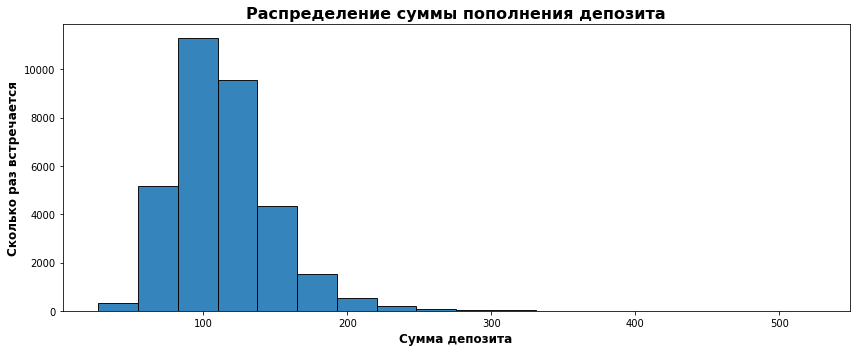

In [7]:
# Смотрим распределение суммы пополнения депозита на выявление выбросов
print(df_hist['amount'].describe([0.25, 0.5, 0.95, 0.99]))

# Визуализируем для наглядности
plt.figure(figsize=(12, 5))

plt.hist(df_hist['amount'], bins=18, edgecolor='black', alpha=0.9)

# Задаем дополнительные настройки по отображению графика
plt.title('Распределение суммы пополнения депозита', fontsize=16, fontdict={'fontweight':'bold'})
plt.xlabel('Сумма депозита', fontsize=12, fontdict={'fontweight':'bold'})
plt.ylabel('Сколько раз встречается', fontsize=12, fontdict={'fontweight':'bold'})
plt.tight_layout()
plt.show()

Среднее и медианное значение имеют близкие значения. Имеются аномально высокие значения, что говорит о том, что присутствуют пользователи, делающие высокие депозиты. Посмотрим сколько таких пользователей:

In [8]:
print(f'''Количество значений, превышающих 99-й перцентиль составляет {len(df_hist[df_hist['amount'] > df_hist['amount'].quantile(0.99)])},
что составляет {len(df_hist[df_hist['amount'] > df_hist['amount'].quantile(0.99)])/len(df_hist[df_hist['amount'] > 0])*100:.1f}%''')

Количество значений, превышающих 99-й перцентиль составляет 329,
что составляет 1.0%


- Анализ распределения сумм депозитов показывает слабую асимметрию, о чем свидетельствуют близкие значения среднего (113.5 у.е.) и медианы (109.0 у.е.). При этом в данных присутствуют аномально высокие значения, подтверждающие наличие пользователей с крупными депозитами.
- Количество операций, превышающих 99-й перцентиль, составляет 329. Хотя статистически эти значения являются выбросами, они отражают реальное поведение пользователей и будут сохранены для анализа как репрезентативная часть исторических данных.

In [9]:
# Смотрим дублирующиеся значения событий для каждого пользователя
df_hist[df_hist.duplicated(subset=['user_id', 'event_name'], keep=False)]

,user_id,country_code,platform,first_ts,first_dt,event_ts,event_name,amount,asset,risk_level


*Явные дубликаты отсутствуют.*

#### 📌 Промежуточные выводы по предобработке данных

- **Качество данных**: Явные и неявные дубликаты записей отсутствуют. Пропуски находятся в столбцах `amount`, `asset` и `risk_level`, что означает, что пользователь не совершал покупку.
- **Корректные типы данных**: Присутствуют три столбца с типом *datetime*. Даты соответствуют исходным данным.
- **Географическое распределение** соответствует целевым рынкам (Бразилия, Мексика, Аргентина, Колумбия).
- **Распределение значений суммы пополнения депозита:** Близкие значения среднего (113.5 у.е.) и медианы (109.0 у.е.), что указывает на слабую асимметрию распределения. Присутстсуют выбросы в верхнем диапазоне (1% значений выше 222 у.е.). Принято решение сохранить все значения, включая выбросы, для обеспечения репрезентативности исторических данных.

### Исследовательский анализ исторических данных

*В рамках этого раздела будет сделано следующее:*
- Изучим динамику привлечения пользователей и их сегментацию.
- Проанализируем пользовательский путь и влияние риска на повторные депозиты.
- Посчитаем распределение средней суммы депозита на одного пользователя.

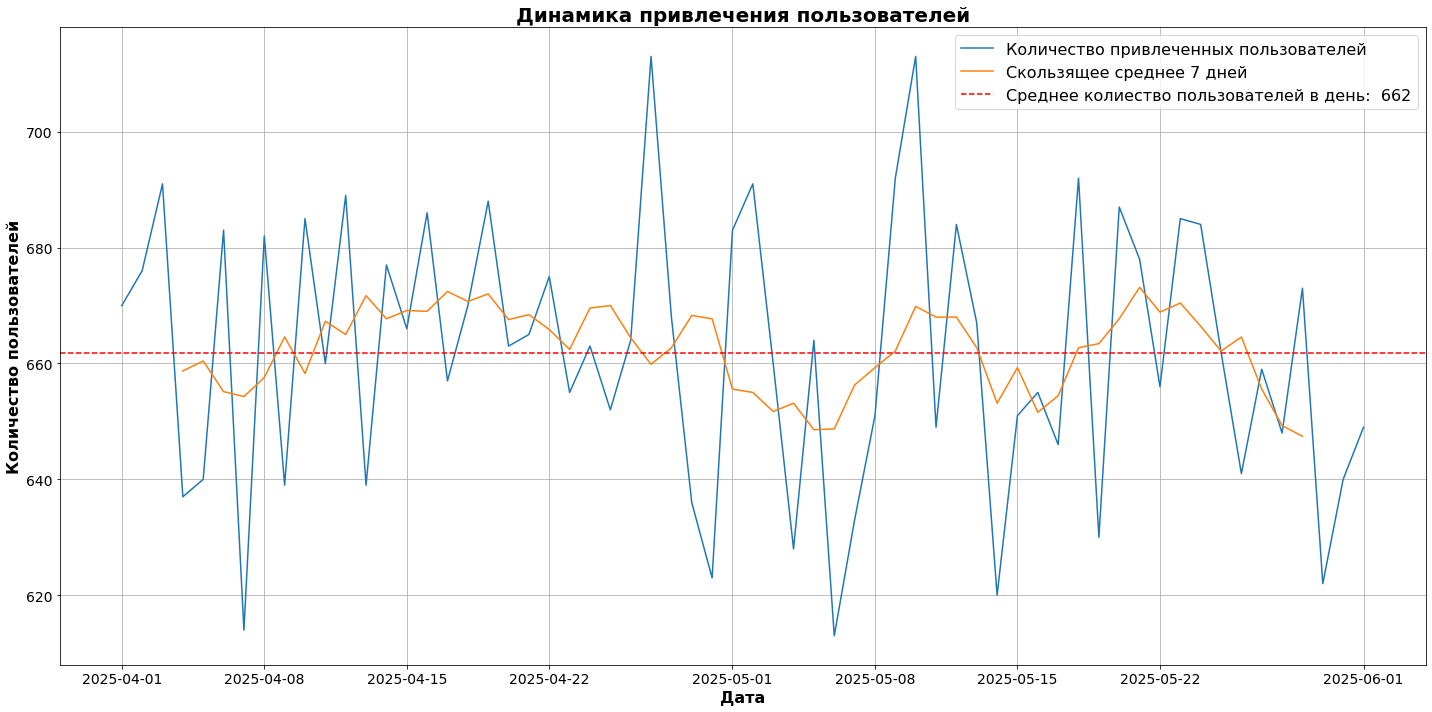

In [10]:
# Посчитаем количество привлеченных пользователей по дням
new_users=df_hist.groupby('first_dt')['user_id'].nunique().reset_index(name='count_users')
# Посчитаем скользящее среднее с периодом окна в 7 дней
new_users['rolling_mean_7']=new_users['count_users'].rolling(window=7, center=True).mean()
# Считаем среднее количество привлеченных пользователей в день
users_mean = new_users['count_users'].mean()

# Задаем размер графика
plt.figure(figsize=(20, 10))

# Визуализируем динамику привлеченных пользователей по дням и скользящее среднее
plt.plot(new_users['first_dt'], new_users['count_users'], label='Количество привлеченных пользователей')
plt.plot(new_users['first_dt'], new_users['rolling_mean_7'], label='Скользящее среднее 7 дней')

# Покажем на графике среднее колиество пользователей в день
plt.axhline(users_mean, color='red', linestyle='--', 
            label=f'Среднее колиество пользователей в день: {users_mean: .0f}')

# Задаем дополнительные настройки по отображению графика
plt.title('Динамика привлечения пользователей', fontsize=20, fontdict={'fontweight':'bold'})
plt.xlabel('Дата', fontsize=16, fontdict={'fontweight':'bold'})
plt.ylabel('Количество пользователей', fontsize=16, fontdict={'fontweight':'bold'})
plt.grid()
plt.tick_params(labelsize=14) 
plt.legend(fontsize=16)
plt.tight_layout()
plt.show()

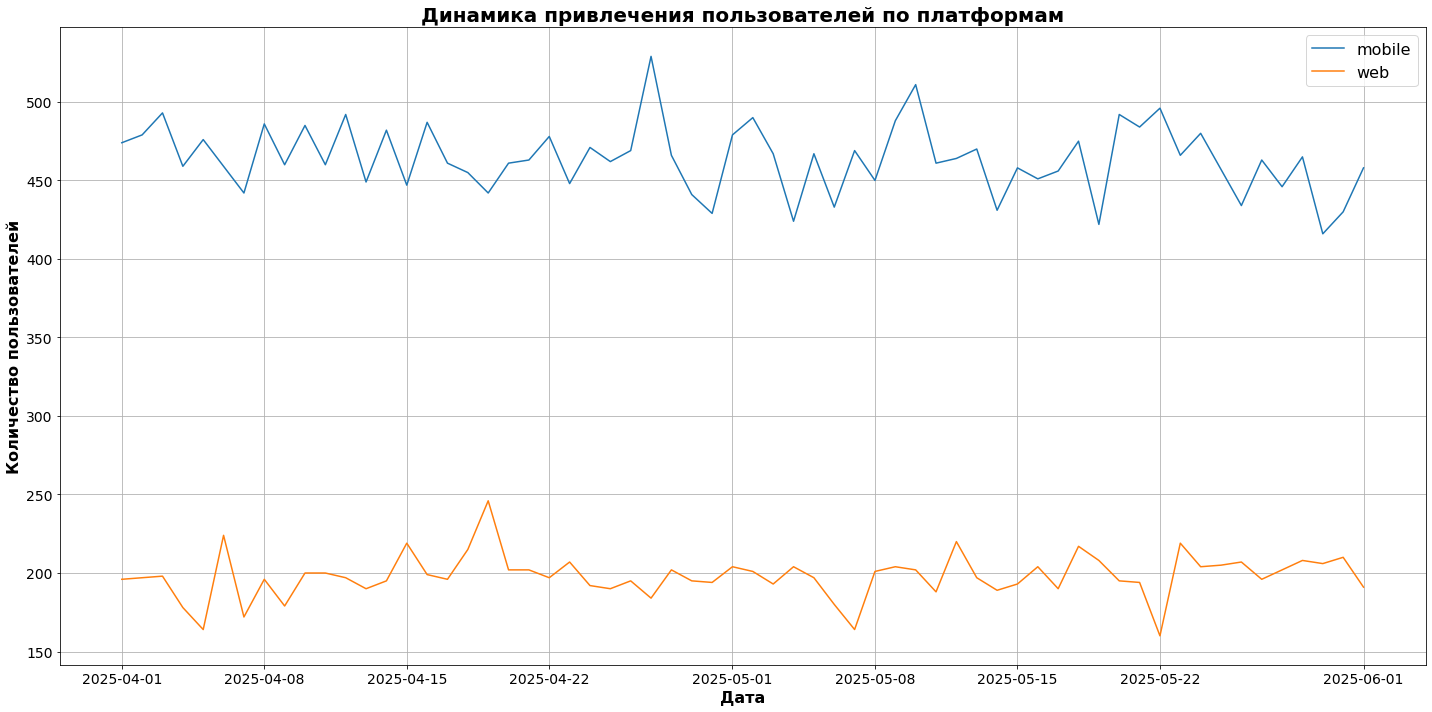

In [11]:
# Посчитаем количество привлеченных пользователей по дням в разрезе платформ
new_users_platform=df_hist.groupby(['platform','first_dt'])['user_id'].nunique().reset_index(name='count_users')

# Задаем размер графика
plt.figure(figsize=(20, 10))

# Визуализируем динамику привлеченных пользователей по дням в разрезе платформ
for platform in new_users_platform['platform'].unique():
    plt.plot(new_users_platform[new_users_platform['platform'] == platform]['first_dt'], 
             new_users_platform[new_users_platform['platform'] == platform]['count_users'],
             label=platform)
    
# Задаем дополнительные настройки по отображению графика
plt.title('Динамика привлечения пользователей по платформам', fontsize=20, fontdict={'fontweight':'bold'})
plt.xlabel('Дата', fontsize=16, fontdict={'fontweight':'bold'})
plt.ylabel('Количество пользователей', fontsize=16, fontdict={'fontweight':'bold'})
plt.grid()
plt.tick_params(labelsize=14) 
plt.legend(fontsize=16)
plt.tight_layout()
plt.show()

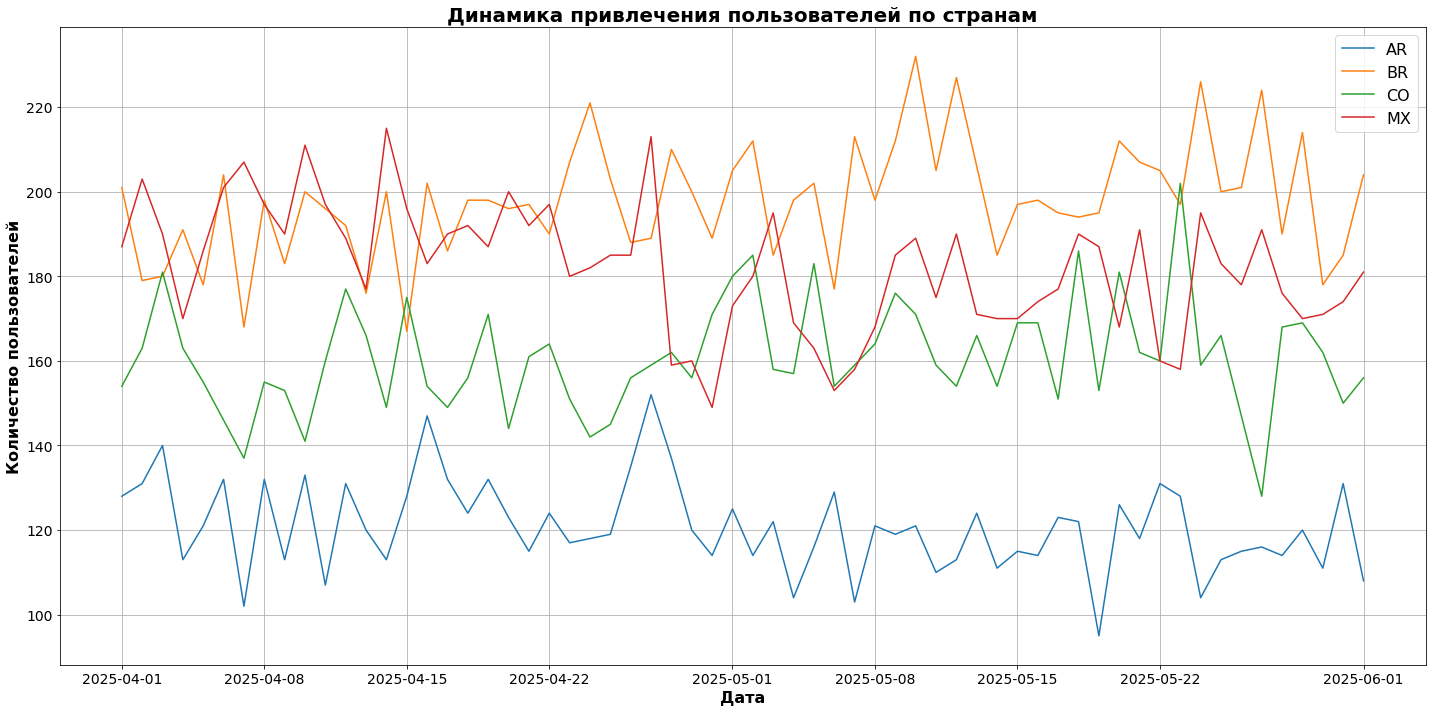

In [12]:
# Посчитаем количество привлеченных пользователей по дням в разрезе стран
new_users_country=df_hist.groupby(['country_code','first_dt'])['user_id'].nunique().reset_index(name='count_users')

# Задаем размер графика
plt.figure(figsize=(20, 10))

# Визуализируем динамику привлеченных пользователей по дням в разрезе платформ
for country in new_users_country['country_code'].unique():
    plt.plot(new_users_country[new_users_country['country_code'] == country]['first_dt'], 
             new_users_country[new_users_country['country_code'] == country]['count_users'],
             label=country)
    
# Задаем дополнительные настройки по отображению графика
plt.title('Динамика привлечения пользователей по странам', fontsize=20, fontdict={'fontweight':'bold'})
plt.xlabel('Дата', fontsize=16, fontdict={'fontweight':'bold'})
plt.ylabel('Количество пользователей', fontsize=16, fontdict={'fontweight':'bold'})
plt.grid()
plt.tick_params(labelsize=14) 
plt.legend(fontsize=16)
plt.tight_layout()
plt.show()

In [13]:
# Посмотрим распределение пользователей по месяцам, для этого создадим столбец с месяцем
df_hist['month']=df_hist['first_dt'].dt.to_period('M').dt.to_timestamp()
# Считаем количество пользователей, зашедших в приложение в каждый месяц
month_users=df_hist.groupby('month')['user_id'].nunique().reset_index(name='count_users')
# Тоже самое, но в процентах
month_users['share_percent']=(month_users['count_users'] / month_users['count_users'].sum() * 100).round(2)
month_users

,month,count_users,share_percent
0,2025-04-01,19926,48.56
1,2025-05-01,20457,49.86
2,2025-06-01,649,1.58


**Динамика привлечения пользователей:**
- **Исторические данные демонстрируют стабильный ежедневный приток новых пользователей в диапазоне 610-710 человек при среднем значении 662 пользователя**. Наблюдается заметная разница в изменчивости показателей между месяцами: в апреле демонстрируется более стабильный приток, тогда как в мае наблюдается увеличение размаха значений, что может быть связано с сезонными факторами, включая майские праздники. Анализ скользящего среднего с 7-дневным окном подтверждает общую стабильность притока с колебаниями в диапазоне 665-670 пользователей.
- **Распределение по платформам показывает явное превосходство мобильного приложения**: 450-500 пользователей против 180-200 пользователей веб-версии. Такая пропорция сохраняется стабильной на протяжении всего анализируемого периода.
- **Географический анализ выявляет значительные региональные различия.** До 22 апреля лидерами привлечения были Мексика и Бразилия с показателями 180-200 пользователей ежедневно. После этой даты произошло выравнивание показателей Мексики и Колумбии (140-190 пользователей), в то время как Аргентина стабильно демонстрирует наименьшие показатели - 110-130 пользователей в день.
- Суммарные показатели привлечения пользователей по месяцам демонстрируют близкие значения: 19,9 тысяч пользователей в апреле и 20,5 тысяч в мае. **Таким образом, динамику привлечения пользователей можно считать стабильной.**

*Далее, построим классическую и пошаговую воронки пользовательского пути в приложении, а также посмотрим, как уровень риска  актива влияет на повторное совершение депозита.*

In [14]:
# Создаем датасет, в котором посчитаем количество пользователей на каждом этапе
funnel=df_hist.groupby('event_name')['user_id'].nunique().sort_values(ascending=False).reset_index(name='count_users')
# Считаем конверсию по классике
funnel['classic_conversion'] = funnel['count_users'] / funnel['count_users'][0] * 100
# Считаем конверсию из следующего этапа в предыдущий (step_by_step)
funnel['step_by_step_conversion'] = funnel['count_users'] / funnel['count_users'].shift(1) * 100
# Выводим результат
funnel

,event_name,count_users,classic_conversion,step_by_step_conversion
0,install / open_web,41032,100.000000,NaN
1,introduction,41032,100.000000,100.000000
2,registration,38133,92.934783,92.934783
3,main_page,35040,85.396764,91.888915
4,onboarding_complete,34337,83.683467,97.993721
5,first_deposit,27685,67.471729,80.627312
6,asset_purchase,15392,37.512186,55.596894
7,second_deposit,5408,13.179957,35.135135


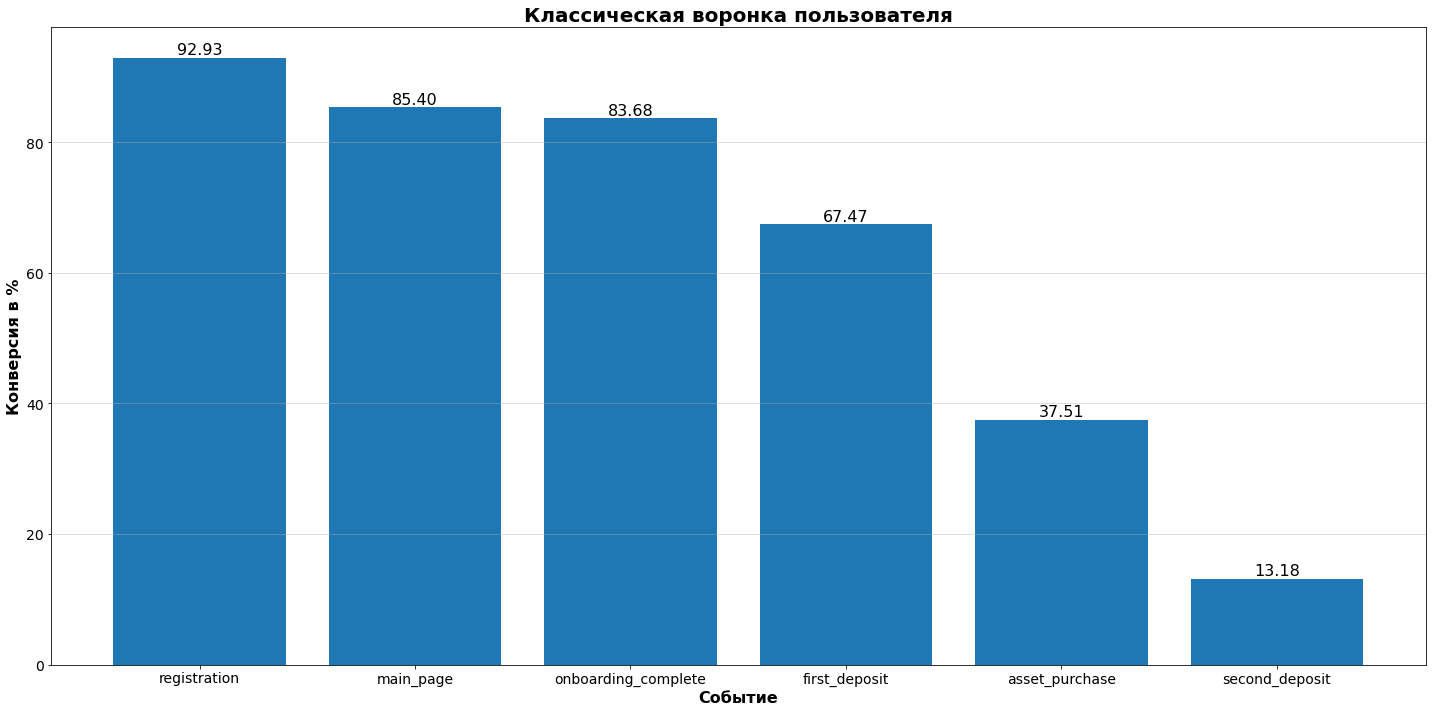

In [15]:
# визуализируем классическую воронку
plt.figure(figsize=(20, 10))

# убираем первые два шага воронки, так как они не несут практической значимости
plt.bar(funnel['event_name'][2::], funnel['classic_conversion'][2::]) 

# Получаем координаты для размещения значений сверху баров
for i, v in enumerate(funnel['classic_conversion'][2::]):
    plt.text(i, v + 0.5, '{:.2f}'.format(v), ha='center', fontsize=16)

# Задаем дополнительные настройки по отображению графика
plt.title('Классическая воронка пользователя', fontsize=20, fontdict={'fontweight':'bold'})
plt.xlabel('Событие', fontsize=16, fontdict={'fontweight':'bold'})
plt.ylabel('Конверсия в %', fontsize=16, fontdict={'fontweight':'bold'})
plt.grid(axis='y', alpha=0.5)
plt.tick_params(labelsize=14) 
plt.tight_layout()
plt.show()

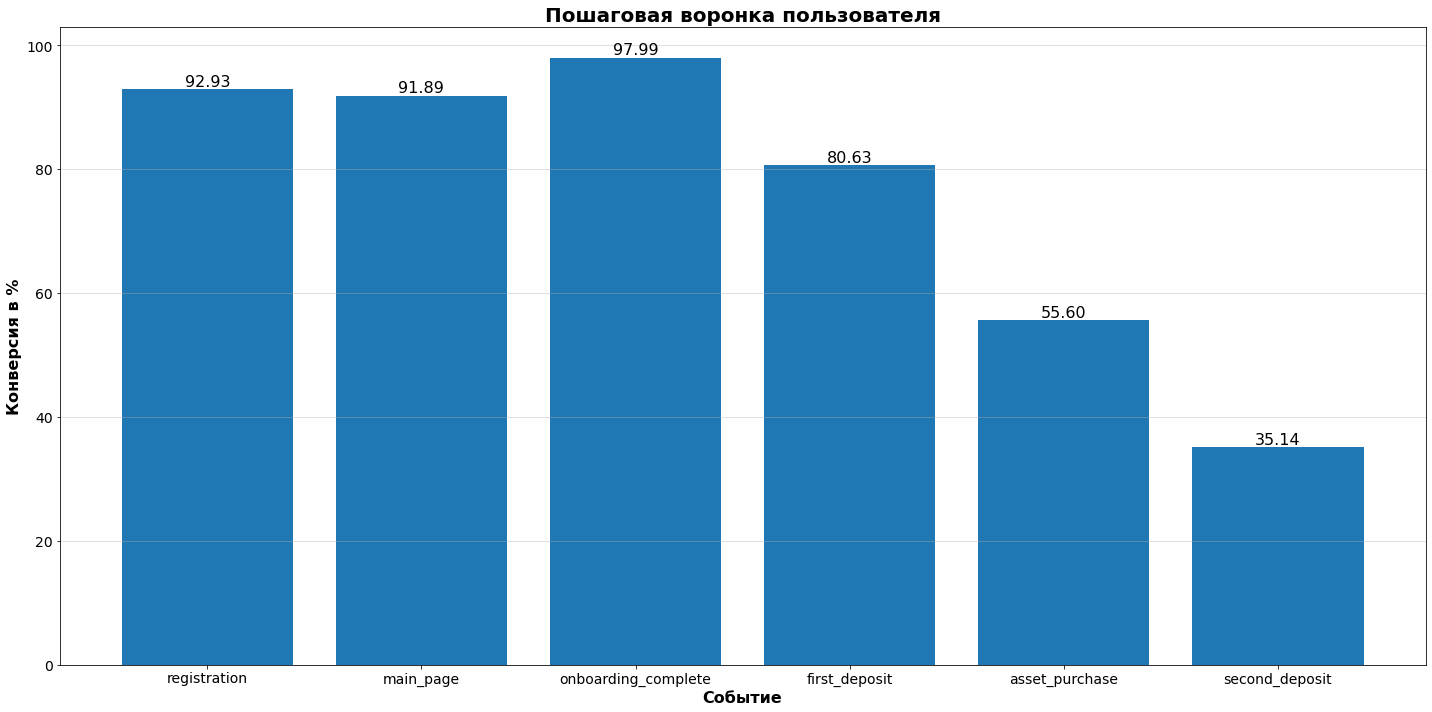

In [16]:
# визуализируем пошаговую воронку
plt.figure(figsize=(20, 10))

# убираем первые два шага воронки, так как они не несут практической значимости
plt.bar(funnel['event_name'][2::], funnel['step_by_step_conversion'][2::]) 

# Получаем координаты для размещения значений сверху баров
for i, v in enumerate(funnel['step_by_step_conversion'][2::]):
    plt.text(i, v + 0.5, '{:.2f}'.format(v), ha='center', fontsize=16)

# Задаем дополнительные настройки по отображению графика
plt.title('Пошаговая воронка пользователя', fontsize=20, fontdict={'fontweight':'bold'})
plt.xlabel('Событие', fontsize=16, fontdict={'fontweight':'bold'})
plt.ylabel('Конверсия в %', fontsize=16, fontdict={'fontweight':'bold'})
plt.grid(axis='y', alpha=0.5)
plt.tick_params(labelsize=14) 
plt.tight_layout()
plt.show()

In [17]:
# Создаем функцию, которая на входе принимает таблицу и на выходе выдает датафрейм с посчитанной конверсией в разрезе риска актива
def conversion_calculation(data):
    # Создаем пустые списки для дальнейшего создания словаря
    keys=[]
    count_users_first=[]
    count_users_second=[]
    # пишем цикл, который будет заполнять список ключами названиями уровня риска, а значения - конверсией из первого во второй депозит
    for level in data['risk_level'].unique():
        data_risk=data[data['risk_level'] == level] # фильтруем датасет по уровню риска
        data_filt=data[ (data['user_id'].isin(data_risk['user_id'])) &
                    (data['event_name'].isin(['first_deposit', 'second_deposit']))
                    ].groupby('event_name')['user_id'].nunique().reset_index(name='count_users') # делаем датасет для расчета конверсии
        if len(data_filt) > 0:
            keys.append(level)
            count_users_first.append(data_filt['count_users'].iloc[0])
            count_users_second.append(data_filt['count_users'].iloc[1])
        
    # Формируем словарь   
    my_dict_first = dict(zip(keys, count_users_first)) 
    my_dict_second = dict(zip(keys, count_users_second)) 
    # Формируем датафрейм из словаря, причем ключи станут индексами
    users_first_deposit = pd.DataFrame.from_dict(my_dict_first, orient='index', columns=['users_first_deposit'])
    # Располагаем индексы в необходимом нам порядке
    users_first_deposit = users_first_deposit.reindex(['low', 'medium', 'high'])
    users_first_deposit = users_first_deposit.rename_axis('risk_level').reset_index()
    users_second_deposit = pd.DataFrame.from_dict(my_dict_second, orient='index', 
                                                  columns=['users_second_deposit']).rename_axis('risk_level').reset_index()
    # Меняем названия индекса и превращаем индекс в отдельный столбец
    conversion_risk=pd.merge(users_first_deposit, users_second_deposit, on='risk_level')
    conversion_risk['conversion']=conversion_risk['users_second_deposit'] / conversion_risk['users_first_deposit'] * 100
    return conversion_risk

In [18]:
# Считаем конверсию из первого во второй депозит в зависимости от уровня риска по историческим данным
conversion_risk_history=conversion_calculation(df_hist)
# Выводим результат
conversion_risk_history

,risk_level,users_first_deposit,users_second_deposit,conversion
0,low,2327,1080,46.411689
1,medium,5325,2288,42.967136
2,high,7740,2040,26.356589


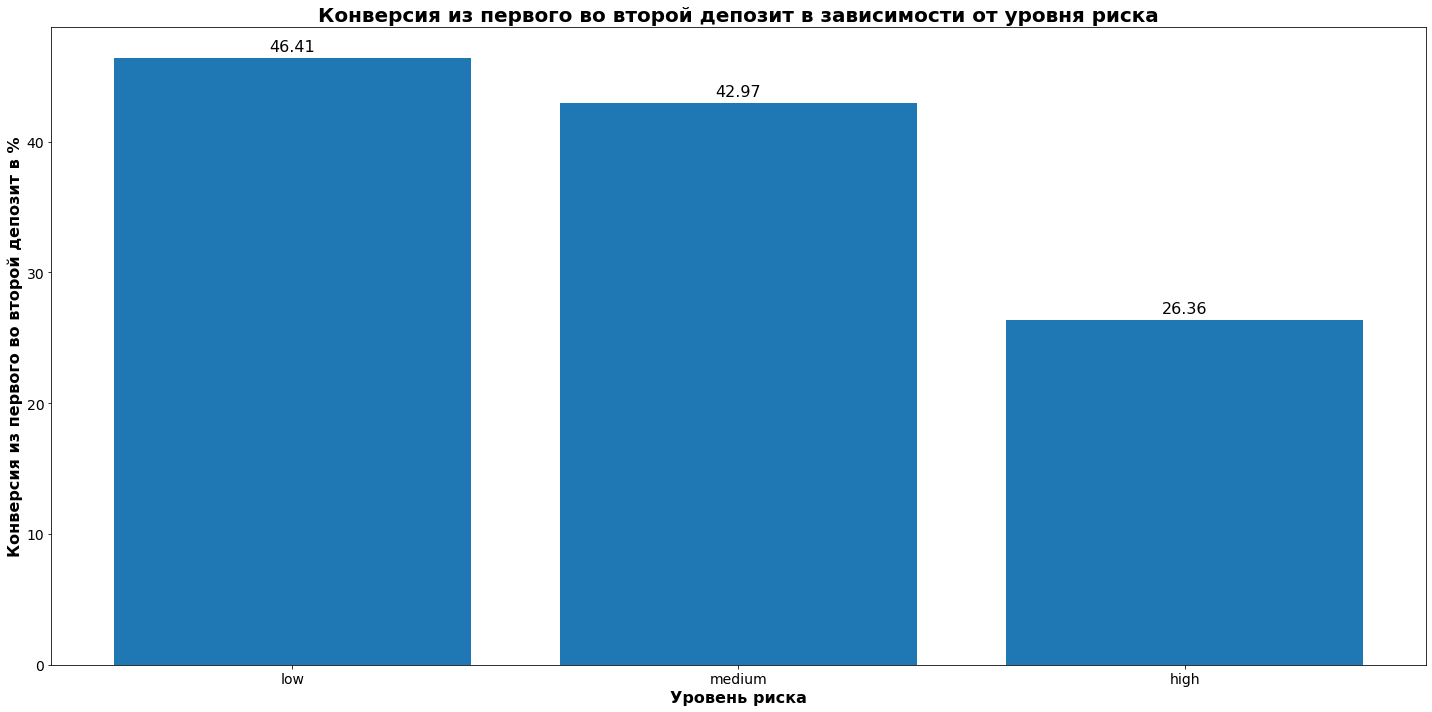

In [19]:
# визуализируем конверсию по уровню риска
plt.figure(figsize=(20, 10))

plt.bar(conversion_risk_history['risk_level'], conversion_risk_history['conversion'])

# Получаем координаты для размещения значений сверху баров
for i, v in enumerate(conversion_risk_history['conversion']):
    plt.text(i, v + 0.5, '{:.2f}'.format(v), ha='center', fontsize=16)

# Задаем дополнительные настройки по отображению графика    
plt.title('Конверсия из первого во второй депозит в зависимости от уровня риска', fontsize=20, fontdict={'fontweight':'bold'})
plt.xlabel('Уровень риска', fontsize=16, fontdict={'fontweight':'bold'})
plt.ylabel('Конверсия из первого во второй депозит в %', fontsize=16, fontdict={'fontweight':'bold'})
plt.tick_params(labelsize=14) 
plt.tight_layout()
plt.show()

**Результаты анализа пользовательского пути и влияния риска на повторные депозиты:**
- **Классическая и пошаговая воронки показывают значительные потери на ключевых этапах:**
    - конверсия в покупку актива стоставляет 37.5% (только 15.3 тыс. пользователей совершают покупку из 41.0 тыс.). На этапе "первый депозит→покупка актива" теряется 44.4% пользователей;
    - только 13.2% пользователей доходят до второго депозита. На этапе "покупка актива → второй депозит" теряется около 65.0% пользователей.
- **Анализ выявил обратную зависимость между уровнем риска первого актива и конверсией во второй депозит.** Пользователи, которые выбирают более рискованные активы при первой покупке, реже делают второй депозит. Это может означать следующее:
    - пользователям нужно больше времени для повторного пополнения депозита;
    - более рискованные активы не требуют быстрой повторной покупки; 
    - пользователи теряют средства при покупке более рискованных активов и поэтому прекращают работу с приложением.

*Далее, построим распределение средней суммы депозита на одного пользователя.*

count    41032.000000
mean        91.562220
std         80.393251
min          0.000000
25%          0.000000
50%         96.000000
95%        241.450000
99%        318.000000
max        656.000000
Name: amount, dtype: float64


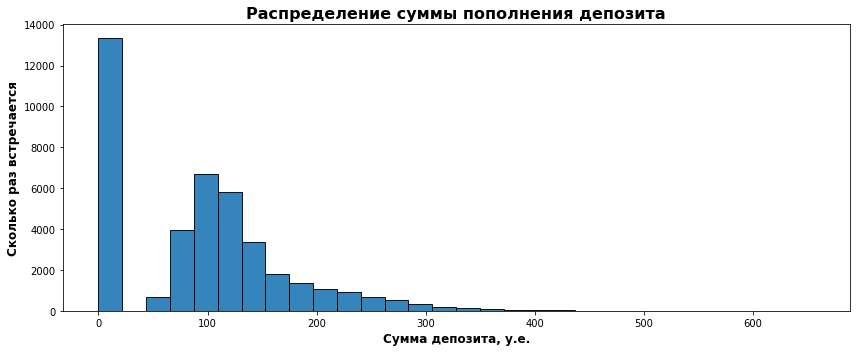

In [20]:
# посмотрим статистику суммы депозита, которые делали все пользователи
print(df_hist.groupby('user_id')['amount'].sum().describe([0.25, 0.5, 0.95, 0.99]))

# визуализируем распределение суммы депозита
plt.figure(figsize=(12, 5))

plt.hist(df_hist.groupby('user_id')['amount'].sum(), bins=30, edgecolor='black', alpha=0.9)

# Задаем дополнительные настройки по отображению графика 
plt.title('Распределение суммы пополнения депозита', fontsize=16, fontdict={'fontweight':'bold'})
plt.xlabel('Сумма депозита, у.е.', fontsize=12, fontdict={'fontweight':'bold'})
plt.ylabel('Сколько раз встречается', fontsize=12, fontdict={'fontweight':'bold'})
plt.tight_layout()
plt.show()

**Результаты анализа распределения суммы пополнения депозита**:
- Средняя сумма пополнения депозита на одного пользователя составляет 91.6 у.е. при стандартном отклонении 80.4 у.е, что свидетельствует о значительном разбросе данных и неоднородности пользовательского поведения.
- Примерно треть пользователей не совершает депозитов вообще, тогда как среди платящих пользователей преобладают депозиты в диапазоне 90-120 у.е. Распределение демонстрирует выраженную правостороннюю асимметрию, что подтверждается сравнением показателей: медиана (96.0 у.е.) превышает среднее значение, а 95-й и 99-й перцентили (241.5 и 318.0 у.е. соответственно) значительно отклоняются от типичных значений. Это указывает на склонность пользователей к высоким депозитам (среди платящих).

### 📌Промежуточные выводы

- **За период апрель-май 2025 года приложение демонстрирует стабильный приток новых пользователей со средним показателем 662 человека в день.** Наблюдается четкое доминирование мобильной платформы (75% установок) над веб-версией. 
- **Анализ пользовательского пути выявил два "слабых места" - этапы перехода к покупке активов и совершения повторного депозита**, на которых теряется 44.4 и 65.0% пользователей.
- **Пользователи, которые выбирают более рискованные активы при первой покупке, реже делают второй депозит.**
- Расчет ключевой метрики показывает среднюю сумму депозита 91,6 у.е. на пользователя при значительном разбросе данных (стандартное отклонение 80,4 у.е.). **Распределение демонстрирует выраженную правостороннюю асимметрию: примерно треть пользователей не совершает депозитов, тогда как среди платящих пользователей преобладают суммы в диапазоне 90-120 у.е.** При этом наличие "длинного правого хвоста" указывает на существование группы пользователей с высокой платежеспособностью.

## Исследование результатов А/В эксперимента
### Предобработка датасета `df_abt`

In [21]:
# Выводим информацию об исходном датасете, смотрим наличие пропусков, типы данных
df_abt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54805 entries, 0 to 54804
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   user_id       54805 non-null  object        
 1   country_code  54805 non-null  object        
 2   platform      54805 non-null  object        
 3   first_ts      54805 non-null  datetime64[ns]
 4   first_dt      54805 non-null  datetime64[ns]
 5   event_ts      54805 non-null  datetime64[ns]
 6   event_name    54805 non-null  object        
 7   ab_test       54805 non-null  object        
 8   group         54805 non-null  object        
 9   amount        7843 non-null   float64       
 10  asset         3750 non-null   object        
 11  risk_level    3750 non-null   object        
dtypes: datetime64[ns](3), float64(1), object(8)
memory usage: 5.0+ MB


Пропуски в данных находятся в столбцах `amount`, `asset` и `risk_level`. Это ожидаемо, так как эти поля заполняются только для пользователей, совершивших покупку актива, что делает их отсутствие закономерным для неактивных пользователей.

In [22]:
# смотрим правильность заполнения столбцов
df_abt.head()

,user_id,country_code,platform,first_ts,first_dt,event_ts,event_name,ab_test,group,amount,asset,risk_level
0,c430acb5-c6bf-43cf-8e2d-7ab9ce0d2c8a,BR,mobile,2025-06-07 19:55:51,2025-06-07,2025-06-07 19:55:51,install / open_web,onboarding_test,test,NaN,NaN,NaN
1,c430acb5-c6bf-43cf-8e2d-7ab9ce0d2c8a,BR,mobile,2025-06-07 19:55:51,2025-06-07,2025-06-07 19:55:54,introduction,onboarding_test,test,NaN,NaN,NaN
2,c430acb5-c6bf-43cf-8e2d-7ab9ce0d2c8a,BR,mobile,2025-06-07 19:55:51,2025-06-07,2025-06-08 06:18:09,registration,onboarding_test,test,NaN,NaN,NaN
3,c430acb5-c6bf-43cf-8e2d-7ab9ce0d2c8a,BR,mobile,2025-06-07 19:55:51,2025-06-07,2025-06-08 06:18:13,main_page,onboarding_test,test,NaN,NaN,NaN
4,c430acb5-c6bf-43cf-8e2d-7ab9ce0d2c8a,BR,mobile,2025-06-07 19:55:51,2025-06-07,2025-06-08 06:33:40,onboarding_complete,onboarding_test,test,NaN,NaN,NaN


In [23]:
# Проверяем категориальные столбцы на наличие неявных дубликатов
for column in obj_type:
    try:
        print(df_abt[column].value_counts())
        print('')
    except KeyError:
        print('')

BR    17369
MX    14551
CO    14260
AR     8625
Name: country_code, dtype: int64

mobile    38640
web       16165
Name: platform, dtype: int64

install / open_web     9415
introduction           9415
registration           8777
main_page              8080
onboarding_complete    7525
first_deposit          6215
asset_purchase         3750
second_deposit         1628
Name: event_name, dtype: int64

stock     1297
crypto    1235
option    1218
Name: asset, dtype: int64

high      1630
medium    1339
low        781
Name: risk_level, dtype: int64

onboarding_test    54805
Name: ab_test, dtype: int64

control    28085
test       26720
Name: group, dtype: int64



Неявные дубликаты (некорректное наименование какой-либо категории в столбцах) отсутствуют.

In [24]:
# Смотрим столбцы с датой (дата привлечения должна быть с 02.06.2025 по 15.06.2025, а дата события после 02.06.2025)
for column in data_type:
    print(f'Столбец {column}')
    print(f'Минимальная дата: {df_abt[column].min()}')
    print(f'Максимальная дата: {df_abt[column].max()}')
    print('')

Столбец first_ts
Минимальная дата: 2025-06-02 00:27:50
Максимальная дата: 2025-06-15 23:58:39

Столбец first_dt
Минимальная дата: 2025-06-02 00:00:00
Максимальная дата: 2025-06-15 00:00:00

Столбец event_ts
Минимальная дата: 2025-06-02 00:27:50
Максимальная дата: 2025-06-22 13:37:05



Даты соответствуют заявленному диапазону (со 2 по 15 июня 2025 года).

In [25]:
# смотрим дублирующиеся значения событий для каждого пользователя
df_abt[df_abt.duplicated(subset=['user_id', 'event_name'], keep=False)]

,user_id,country_code,platform,first_ts,first_dt,event_ts,event_name,ab_test,group,amount,asset,risk_level


Явные дубликаты отсутствуют.

count    3882.000000
mean      112.672334
std        33.680537
min        25.000000
25%        89.000000
50%       108.000000
95%       172.950000
99%       214.000000
max       322.000000
Name: amount, dtype: float64


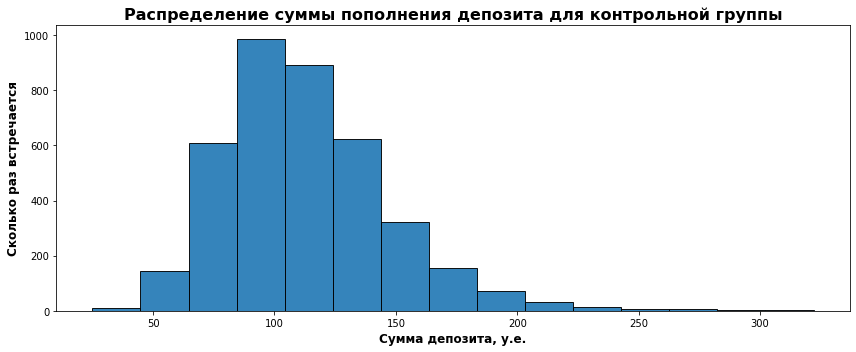

In [26]:
# смотрим распределение суммы пополнения депозита на выявление выбросов для контрольной группы
print(df_abt[df_abt['group'] == 'control']['amount'].describe([0.25, 0.5, 0.95, 0.99]))

plt.figure(figsize=(12, 5))

# Визуализируем для наглядности
plt.hist(df_abt[df_abt['group'] == 'control']['amount'], bins=15, edgecolor='black', alpha=0.9)

# Задаем дополнительные настройки по отображению графика 
plt.title('Распределение суммы пополнения депозита для контрольной группы', fontsize=16, fontdict={'fontweight':'bold'})
plt.xlabel('Сумма депозита, у.е.', fontsize=12, fontdict={'fontweight':'bold'})
plt.ylabel('Сколько раз встречается', fontsize=12, fontdict={'fontweight':'bold'})
plt.tight_layout()
plt.show()

*Анализ распределения сумм депозитов в контрольной группе показывает слабую асимметрию, о чем свидетельствуют близкие значения среднего (112.7 у.е.) и медианы (108.0 у.е.). При этом в данных присутствуют аномально высокие значения, подтверждающие наличие пользователей с крупными депозитами - около 1% пользователей совершили депозит на суммы от 214.0 до 322.0 у.е.*

count    3961.000000
mean      106.629891
std       117.146019
min        25.000000
25%        35.000000
50%        67.000000
95%       324.000000
99%       619.600000
max      1050.000000
Name: amount, dtype: float64


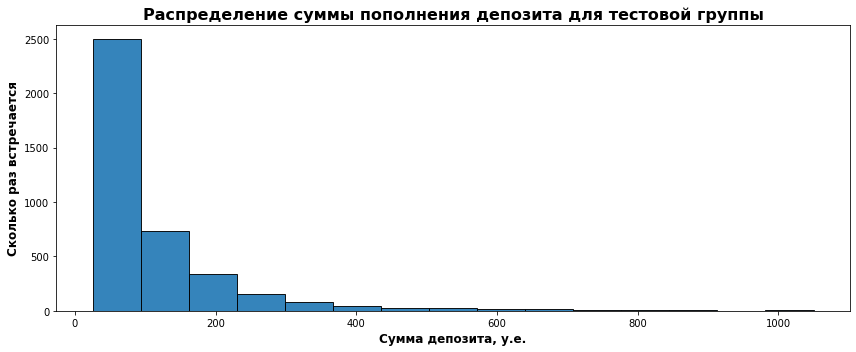

In [27]:
# смотрим распределение суммы пополнения депозита на выявление выбросов для тестовой группы
print(df_abt[df_abt['group'] == 'test']['amount'].describe([0.25, 0.5, 0.95, 0.99]))

plt.figure(figsize=(12, 5))

# Визуализируем для наглядности
plt.hist(df_abt[df_abt['group'] == 'test']['amount'], bins=15, edgecolor='black', alpha=0.9)

# Задаем дополнительные настройки по отображению графика 
plt.title('Распределение суммы пополнения депозита для тестовой группы', fontsize=16, fontdict={'fontweight':'bold'})
plt.xlabel('Сумма депозита, у.е.', fontsize=12, fontdict={'fontweight':'bold'})
plt.ylabel('Сколько раз встречается', fontsize=12, fontdict={'fontweight':'bold'})
plt.tight_layout()
plt.show()

- Распределение сумм депозитов в тестовой группе демонстрирует выраженную правостороннюю асимметрию со средним значением 106.6 у.е. (при этом медиана существенно ниже и составляет 67.0 у.е.) и значительным разбросом (std = 117.1). 
- Около 60% пользователей вносят суммы до 100 у.е., при этом более 5% совершают депозиты, превышающие максимальное значение контрольной группы. Выявленная группа "китов" с депозитами до 1050 у.е. представляет особую ценность для монетизации и будут сохранены для анализа.

#### 📌 Промежуточные выводы по предобработке данных

- **Качество данных**: Явные и неявные дубликаты записей отсутствуют. Пропуски находятся в столбцах `amount`, `asset` и `risk_level`, что означает, что пользователь не совершал покупку.
- **Корректные типы данных**: Присутствуют три столбца с типом *datetime*. Даты соответствуют исходным данным.
- **Распределение значений суммы пополнения депозита:** Распределение сумм депозитов в контрольной группе соответствует историческим данным без значительных изменений. В тестовой группе наблюдается выраженная правосторонняя асимметрия со средним значением 106.6 у.е. В тестовой группе, несмотря на более низкую медиану (67 у.е.), выявлена значительная доля крупных депозитов - свыше 5% пользователей внесли суммы, превышающие максимальные значения контрольной группы.

### Оценка корректности проведения А/В-эксперимента

In [28]:
# Считаем количество пользователей в каждой группе теста
comparison_groups=df_abt.groupby('group')['user_id'].nunique().reset_index(name='count_users')
# считаем долю пользователей в каждой группе
comparison_groups['share_users']=comparison_groups['count_users'] / comparison_groups['count_users'].sum() * 100
comparison_groups

,group,count_users,share_users
0,control,4847,51.481678
1,test,4568,48.518322


Теперь проверим, была ли вероятность попасть в группы одинаковой.

Вероятность попасть в контрольную группу составила 51.5%. Проверим одновыборочным `z-тестом` для пропорций:
- **Нулевая гипотеза:** вероятность попасть в контрольную группу составляет 50%.
- **Альтернативаня гипотеза:** вероятность попасть в контрольную группу отличается от 50%.

In [29]:
# Задаем уровень значимости
alpha = 0.05

# Проводим одновыборочный z-тест
stat_ztest, p_value_ztest = proportions_ztest(comparison_groups[comparison_groups['group']=='control']['count_users'].iloc[0],
                                              comparison_groups['count_users'].sum(),
                                              value=0.5)
# выводим p-value 
print(f'pvalue={round(p_value_ztest, 4)}')

# выводим результат теста
if p_value_ztest > alpha:
    print('Нулевая гипотеза не отвергается: вероятность попасть в контрольную группу составляет 50%')
else:
    print('Нулевая гипотеза отвергается: вероятность попасть в контрольную группу отличается от 50%')

pvalue=0.004
Нулевая гипотеза отвергается: вероятность попасть в контрольную группу отличается от 50%


*Статистический анализ распределения пользователей между группами показал наличие значимого отклонения от планируемого распределения 50/50 (p-value = 0.004). Несмотря на статистическую значимость выявленного различия, его абсолютная величина (3%) не оказывает существенного влияния на результаты эксперимента.*

Далее, рассмотрим как отдельные группы пользователей распределились по группам эксперимента.

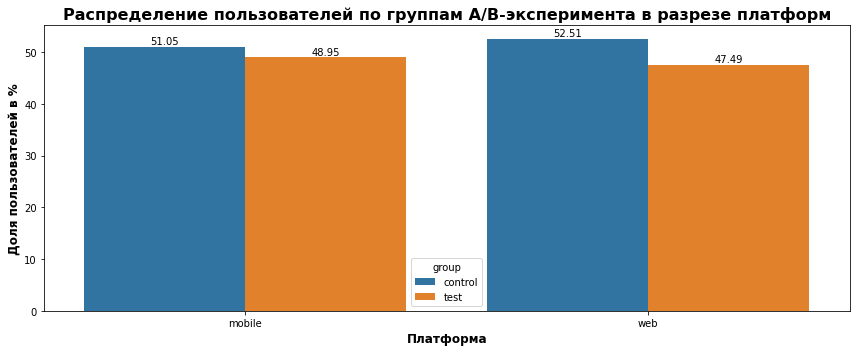

In [30]:
# Проверим, как распределились пользователи по платформам в контрольной и тестовой группах

# считаем количество пользователей в каждой группе в разрезе платформы
platform_grouped = df_abt.groupby(['platform', 'group'])['user_id'].nunique().reset_index(name='count_users')

# считаем суммарное количество пользователей по каждой платформе
platform_total = platform_grouped.groupby('platform')['count_users'].sum().reset_index(name='total_users')

# объединяем таблицы
platform_grouped = pd.merge(platform_grouped, platform_total, how='left', on='platform')

# считаем долю пользователей по платформам
platform_grouped['share_users'] = platform_grouped['count_users'] / platform_grouped['total_users'] * 100

# Визуализируем долю пользователей в группах в разрезе каждой платформы
plt.figure(figsize=(12, 5))

ax=sns.barplot(data=platform_grouped, x='platform', y='share_users', hue='group')

# Получаем координаты для размещения значений сверху баров
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.01*height, '{:.2f}'.format(height), ha="center")

# Задаем дополнительные настройки по отображению графика     
plt.title('Распределение пользователей по группам А/В-эксперимента в разрезе платформ', fontsize=16, fontdict={'fontweight':'bold'})
plt.xlabel('Платформа', fontsize=12, fontdict={'fontweight':'bold'})
plt.ylabel('Доля пользователей в %', fontsize=12, fontdict={'fontweight':'bold'})
plt.tight_layout()
plt.show()

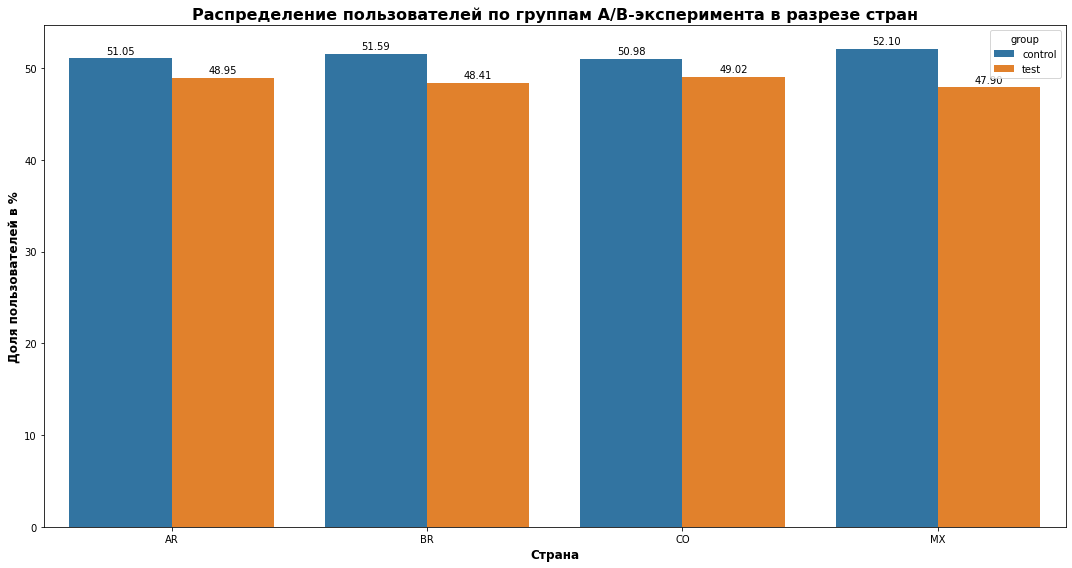

In [31]:
# Проверим, как распределились пользователи по странам в контрольной и тестовой группах

# считаем количество пользователей в каждой группе в разрезе стран
platform_grouped2 = df_abt.groupby(['country_code', 'group'])['user_id'].nunique().reset_index(name='count_users')

# считаем суммарное количество пользователей в каждой стране
platform_total2 = platform_grouped2.groupby('country_code')['count_users'].sum().reset_index(name='total_users')

# объединяем таблицы
platform_grouped2 = pd.merge(platform_grouped2, platform_total2, how='left', on='country_code')

# считаем долю пользователей по странам
platform_grouped2['share_users'] = platform_grouped2['count_users'] / platform_grouped2['total_users'] * 100

# Визуализируем долю пользователей в группах в разрезе каждой платформы
plt.figure(figsize=(15, 8))

ax = sns.barplot(data=platform_grouped2, x='country_code', y='share_users', hue='group')

# Получаем координаты для размещения значений сверху баров
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.01*height, '{:.2f}'.format(height), ha="center")

# Задаем дополнительные настройки по отображению графика 
plt.title('Распределение пользователей по группам А/В-эксперимента в разрезе стран', fontsize=16, fontdict={'fontweight':'bold'})
plt.xlabel('Страна', fontsize=12, fontdict={'fontweight':'bold'})
plt.ylabel('Доля пользователей в %', fontsize=12, fontdict={'fontweight':'bold'})
plt.tight_layout()
plt.show()

**Анализ распределения пользователей по платформам и странам:**
- Различия в распределении пользователей между группами не превышают 5%, что подтверждает равномерность распределения по типам устройств. 
- Различия в распределении пользователей между странами составляют не превышают 3.2%, что подтверждает равномерность распределения по странам.

### Оценка пользовательского пути в контрольной и тестовой группах
Сравним пользовательский путь новых пользователей в тестовой и контрольной группах с помощью классической и последовательной воронки.

In [32]:
# выделяем два отдельных датасета с контрольной и тестовой группой
control_group=df_abt[df_abt['group'] == 'control']
test_group=df_abt[df_abt['group'] == 'test']

In [33]:
# создаем датасет, в котором посчитаем количество пользователей на каждом этапе
control_funnel=control_group.groupby('event_name')['user_id'].nunique().sort_values(ascending=False).reset_index(name='count_users')
# считаем классическую конверсию
control_funnel['classic_conversion'] = control_funnel['count_users'] / control_funnel['count_users'][0] * 100
# считаем конверсию из следующего этапа в предыдущий (step_by_step)
control_funnel['step_by_step_conversion'] = control_funnel['count_users'] / control_funnel['count_users'].shift(1) * 100
# делаем столбец с названием группы
control_funnel['group']='control'
control_funnel

,event_name,count_users,classic_conversion,step_by_step_conversion,group
0,install / open_web,4847,100.000000,NaN,control
1,introduction,4847,100.000000,100.000000,control
2,registration,4512,93.088508,93.088508,control
3,main_page,4161,85.846916,92.220745,control
4,onboarding_complete,4063,83.825046,97.644797,control
5,first_deposit,3228,66.597896,79.448683,control
6,asset_purchase,1773,36.579327,54.925651,control
7,second_deposit,654,13.492882,36.886633,control


In [34]:
# создаем датасет, в котором посчитаем количество пользователей на каждом этапе
test_funnel=test_group.groupby('event_name')['user_id'].nunique().sort_values(ascending=False).reset_index(name='count_users')
# считаем классическую конверсию
test_funnel['classic_conversion'] = test_funnel['count_users'] / test_funnel['count_users'][0] * 100
# считаем конверсию из следующего этапа в предыдущий (step_by_step)
test_funnel['step_by_step_conversion'] = test_funnel['count_users'] / test_funnel['count_users'].shift(1) * 100
# делаем столбец с названием группы
test_funnel['group']='test'
test_funnel

,event_name,count_users,classic_conversion,step_by_step_conversion,group
0,install / open_web,4568,100.000000,NaN,test
1,introduction,4568,100.000000,100.000000,test
2,registration,4265,93.366900,93.366900,test
3,main_page,3919,85.792469,91.887456,test
4,onboarding_complete,3462,75.788091,88.338862,test
5,first_deposit,2987,65.389667,86.279607,test
6,asset_purchase,1977,43.279335,66.186810,test
7,second_deposit,974,21.322242,49.266566,test


In [35]:
# объединяем полученные датасеты в один
common_funnel=pd.concat([control_funnel, test_funnel])
common_funnel

,event_name,count_users,classic_conversion,step_by_step_conversion,group
0,install / open_web,4847,100.000000,NaN,control
1,introduction,4847,100.000000,100.000000,control
2,registration,4512,93.088508,93.088508,control
3,main_page,4161,85.846916,92.220745,control
4,onboarding_complete,4063,83.825046,97.644797,control
5,first_deposit,3228,66.597896,79.448683,control
6,asset_purchase,1773,36.579327,54.925651,control
7,second_deposit,654,13.492882,36.886633,control
0,install / open_web,4568,100.000000,NaN,test
1,introduction,4568,100.000000,100.000000,test


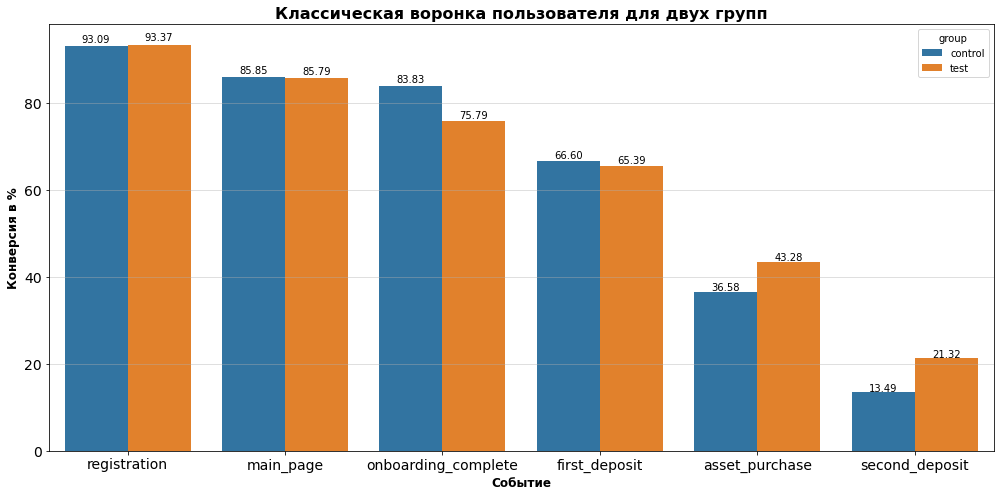

In [36]:
# визуализируем классическую воронку
plt.figure(figsize=(14, 7))

ax=sns.barplot(data=common_funnel[~common_funnel['event_name'].isin(['install / open_web', 'introduction'])], 
            x='event_name', y='classic_conversion', hue='group')

# Получаем координаты для размещения значений сверху баров
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.01*height, '{:.2f}'.format(height), ha="center")

# Задаем дополнительные настройки по отображению графика     
plt.title('Классическая воронка пользователя для двух групп', fontsize=16, fontdict={'fontweight':'bold'})
plt.xlabel('Событие', fontsize=12, fontdict={'fontweight':'bold'})
plt.ylabel('Конверсия в %', fontsize=12, fontdict={'fontweight':'bold'})
plt.grid(axis='y', alpha=0.5)
plt.tick_params(labelsize=14) 
plt.tight_layout()
plt.show()

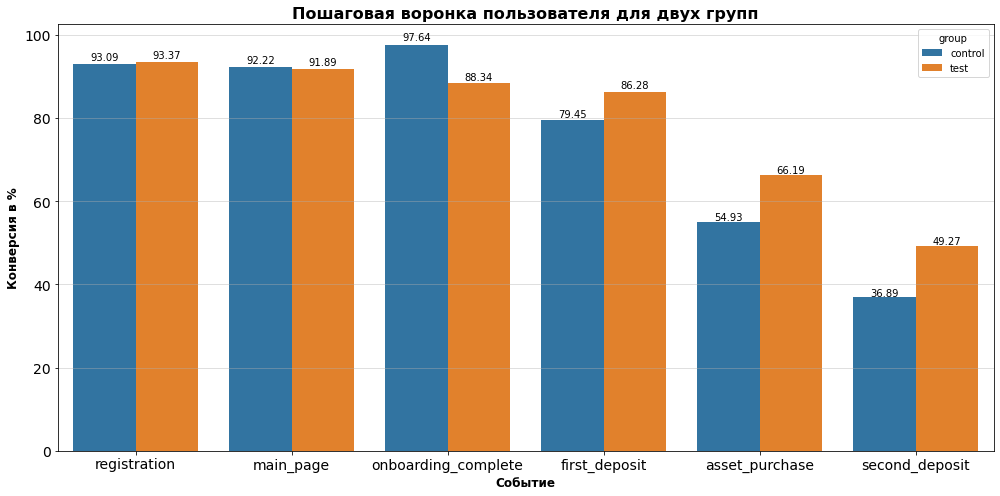

In [37]:
# визуализируем пошаговую воронку
plt.figure(figsize=(14, 7))

ax=sns.barplot(data=common_funnel[~common_funnel['event_name'].isin(['install / open_web', 'introduction'])], 
            x='event_name', y='step_by_step_conversion', hue='group')

# Получаем координаты для размещения значений сверху баров
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.01*height, '{:.2f}'.format(height), ha="center")

# Задаем дополнительные настройки по отображению графика  
plt.title('Пошаговая воронка пользователя для двух групп', fontsize=16, fontdict={'fontweight':'bold'})
plt.xlabel('Событие', fontsize=12, fontdict={'fontweight':'bold'})
plt.ylabel('Конверсия в %', fontsize=12, fontdict={'fontweight':'bold'})
plt.grid(axis='y', alpha=0.5)
plt.tick_params(labelsize=14) 
plt.tight_layout()
plt.show()

**Сравнительный анализ воронок конверсии выявил следующие особенности:**
- На этапе завершения онбординга в тестовой группе наблюдается значимое снижение конверсии - 12% пользователей не завершили онбординг против 2.4% в контрольной группе. Однако пользователи, прошедшие обновленный онбординг, демонстрируют более высокую вовлеченность - конверсия в первый депозит составляет 86% против 79% в контрольной группе.
- На последующих этапах у тестовой группы сохраняется положительная динамика: количество пользователей, совершивших покупку актива возросло на 200 человек (+7%), а совершивших повторный депозит - на 320 пользователей (+8%).

### Сравнительный анализ конверсии во второй депозит по категориям риска актива
Посмотрим, как категория риска купленного актива влияет на вероятность открытия второго депозита в тестовой и контрольной группах.

In [38]:
# по ранее сделанной функции делаем датасеты с конверсией из первого депозита во второй по уровням риска для каждой группы
# для контрольной группы
control_conversion=conversion_calculation(control_group)
control_conversion['group']='control'
# для тестовой группы
test_conversion=conversion_calculation(test_group)
test_conversion['group']='test'

# объединяем два датасета в один
common_conversion=pd.concat([control_conversion, test_conversion])
common_conversion

,risk_level,users_first_deposit,users_second_deposit,conversion,group
0,low,285,142,49.824561,control
1,medium,595,265,44.537815,control
2,high,893,247,27.659574,control
0,low,496,285,57.459677,test
1,medium,744,350,47.043011,test
2,high,737,339,45.997286,test


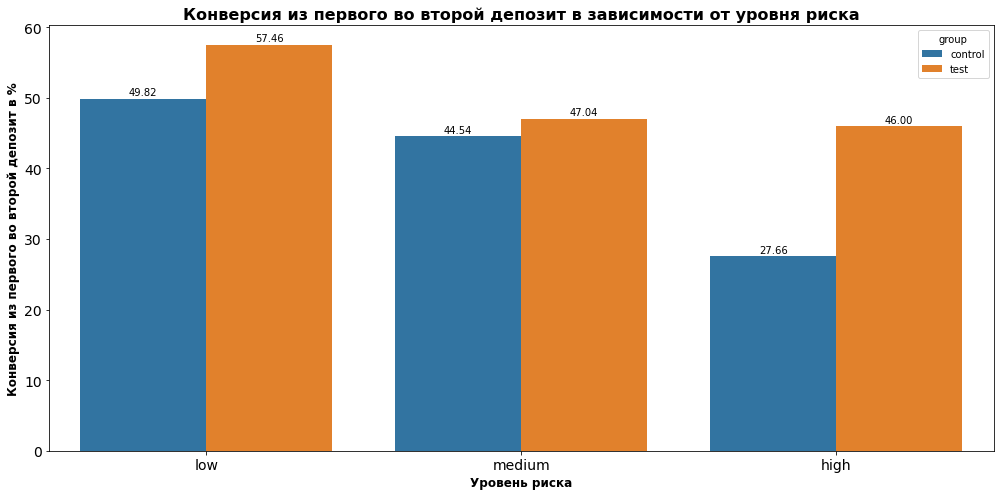

In [39]:
# визуализируем конверсию по группам
plt.figure(figsize=(14, 7))

ax=sns.barplot(data=common_conversion, 
            x='risk_level', y='conversion', hue='group')
# Получаем координаты для размещения значений сверху баров
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.01*height, '{:.2f}'.format(height), ha="center")

# Задаем дополнительные настройки по отображению графика      
plt.title('Конверсия из первого во второй депозит в зависимости от уровня риска', fontsize=16, fontdict={'fontweight':'bold'})
plt.xlabel('Уровень риска', fontsize=12, fontdict={'fontweight':'bold'})
plt.ylabel('Конверсия из первого во второй депозит в %', fontsize=12, fontdict={'fontweight':'bold'})
plt.tick_params(labelsize=14) 
plt.tight_layout()
plt.show()

Перед проведением теста сформируем гипотезы:

- **Нулевая гипотеза:** Доля пользователей, открывших второй депозит, в контрольной и тестовой группах не различается.
- **Альтернативаня гипотеза:** Доля пользователей, открывших второй депозит, в контрольной и тестовой группах имеет статистически значимое различие.


In [40]:
# Задаем уровень значимости
alpha = 0.05

# Для каждого уровня риска проведем z-тест пропорций между контрольной и тестовой групп
for level in common_conversion['risk_level'].unique():
    # Посчитаем количество пользователей, сделавших первый депозит в контрольной (A) и тестовой (B) группах
    n_a=common_conversion[(common_conversion['group']=='control') & (common_conversion['risk_level'] == level)]['users_first_deposit'].iloc[0]
    n_b=common_conversion[(common_conversion['group']=='test') & (common_conversion['risk_level'] == level)]['users_first_deposit'].iloc[0]

    # Посчитаем количество пользователей, сделавших второй депозит в контрольной (A) и тестовой (B) группах
    m_a=common_conversion[(common_conversion['group']=='control') & (common_conversion['risk_level'] == level)]['users_second_deposit'].iloc[0]
    m_b=common_conversion[(common_conversion['group']=='test') & (common_conversion['risk_level'] == level)]['users_second_deposit'].iloc[0]

    # посчитаем конверсию из первого во второй депозит
    p_a=m_a/n_a
    p_b=m_b/n_b
    print(f'УРОВЕНЬ РИСКА: {level}')
    
    # проверяем предпосылку о достаточном количестве данных
    if (p_a*n_a > 10) and ((1-p_a)*n_a > 10) and (p_b*n_b > 10) and ((1-p_b)*n_b > 10):
        print('Предпосылка о достаточном количестве данных выполняется!')
    else:
        print('Предпосылка о достаточном количестве данных НЕ выполняется!')
    
    # проводим z-тест
    stat_ztest, p_value_ztest = proportions_ztest( [m_a, m_b],
                                               [n_a, n_b],
                                               alternative='two-sided')
    # выводим полученное p-value 
    print(f'pvalue={round(p_value_ztest, 4)}')
    # выводим результат теста
    if p_value_ztest > alpha:
        print('''Принимаем НУЛЕВУЮ гипотезу! 
Доля пользователей, открывших второй депозит, в контрольной и тестовой группах не различается.''')
    else:
        print('''Принимаем АЛЬТЕРНАТИВНУЮ гипотезу! 
Доля пользователей, открывших второй депозит, в контрольной и тестовой группах имеет статистически значимое различие.''')
    print('')

УРОВЕНЬ РИСКА: low
Предпосылка о достаточном количестве данных выполняется!
pvalue=0.0391
Принимаем АЛЬТЕРНАТИВНУЮ гипотезу! 
Доля пользователей, открывших второй депозит, в контрольной и тестовой группах имеет статистически значимое различие.

УРОВЕНЬ РИСКА: medium
Предпосылка о достаточном количестве данных выполняется!
pvalue=0.3607
Принимаем НУЛЕВУЮ гипотезу! 
Доля пользователей, открывших второй депозит, в контрольной и тестовой группах не различается.

УРОВЕНЬ РИСКА: high
Предпосылка о достаточном количестве данных выполняется!
pvalue=0.0
Принимаем АЛЬТЕРНАТИВНУЮ гипотезу! 
Доля пользователей, открывших второй депозит, в контрольной и тестовой группах имеет статистически значимое различие.



**Выводы по конверсии из первого во второй депозит:**
- **Активы с низким уровнем риска.** В тестовой группе наблюдается значительный рост конверсии — на 7,4% выше, чем в контрольной группе. Количественные изменения подтверждают эту динамику: количество первых депозитов выросло на 200 пользователей (с 285 до 496), а повторных депозитов — в два раза (с 142 до 285).
- **Активы со средним уровнем риска.** Разница в конверсии между группами составляет 2,5%, что статистически незначимо. Данный результат позволяет сделать вывод об отсутствии выраженного влияния нового онбординга на поведение пользователей, выбирающих активы средней рискованности.
- **Активы с высоким уровнем риска**. Здесь выявлена наиболее заметная положительная динамика: конверсия в тестовой группе на 18,3% выше. Хотя количество первых депозитов снизилось (с 893 до 737 пользователей), количество вторых депозитов существенно возросло (с 247 до 339). Это свидетельствует о более осознанном подходе к высокорискованным инвестициям после прохождения обновлённого онбординга.

### Анализ метрик А/В-эксперимента
#### Ключевая метрика - средняя сумма всех депозитов на одного пользователя

In [41]:
# Считаем сумму депозитов на каждого пользователя в двух группах
user_amount_control=control_group.groupby('user_id')['amount'].sum()
user_amount_test=test_group.groupby('user_id')['amount'].sum()

# Считаем среднюю сумму всех депозитов на одного пользователя (включая тех, кто установил приложение или открыл веб-версию)
mean_amount_control=user_amount_control.mean()
mean_amount_test=user_amount_test.mean()

# Считаем абсолютное изменение значений в тестовой группе по сравнению с контрольной
mean_amount_abs=mean_amount_test-mean_amount_control

# Считаем относительное изменение значений в тестовой группе по сравнению с контрольной
mean_amount_relative=(mean_amount_test-mean_amount_control)/mean_amount_control*100

print(f'''Средняя сумма всех депозитов на одного пользователя в тестовой группе: {mean_amount_test:.2f}
Средняя сумма всех депозитов на одного пользователя в контрольной группе: {mean_amount_control:.2f}
Абсолютное изменение метрики: {mean_amount_abs:.2f}
Относительное изменение метрики: {mean_amount_relative:.2f}%''')

Средняя сумма всех депозитов на одного пользователя в тестовой группе: 92.46
Средняя сумма всех депозитов на одного пользователя в контрольной группе: 90.24
Абсолютное изменение метрики: 2.22
Относительное изменение метрики: 2.46%


Далее, проведем `t-тест` Уэлча (так как равенство дисперсий нам неизвестно), чтобы убедиться, что значения ключевой метрики в двух группах не различается или различия не статистически значимы. Для этого сформулируем гипотезы:

- **Нулевая гипотеза:** Средняя сумма всех депозитов на одного пользователя в контрольной и тестовой группах не различается.
- **Альтернативаня гипотеза:** Средняя сумма всех депозитов на одного пользователя в контрольной и тестовой группах имеет статистически значимое различие.

In [42]:
alpha=0.05
# проводим тест
p_value_ttest = ttest_ind(user_amount_control,
                          user_amount_test,
                          equal_var=False,
                          alternative='two-sided')[1]

# выведем полученное p-value 
print(f'pvalue={round(p_value_ttest, 4)}') 

# Отображаем результат
if p_value_ttest > alpha:
    print('''Принимаем НУЛЕВУЮ гипотезу! 
Средняя сумма всех депозитов на одного пользователя в контрольной и тестовой группах не различается.''')
else:
    print('''Принимаем АЛЬТЕРНАТИВНУЮ гипотезу! 
Средняя сумма всех депозитов на одного пользователя в контрольной и тестовой группах имеет статистически значимое различие.''')

pvalue=0.3383
Принимаем НУЛЕВУЮ гипотезу! 
Средняя сумма всех депозитов на одного пользователя в контрольной и тестовой группах не различается.


Рассмотрим накопленную динамику изменения ключевой метрики по дням эксперимента для каждой группы.

In [43]:
# Создадим столбец с датой
df_abt['event_date']=df_abt['event_ts'].dt.date
df_abt['first_dt']=df_abt['first_dt'].dt.date

In [44]:
# Создаем пустой список
records=[]

# Сделаем цикл, который будет вносить в список таблицу с накопленной суммой депозитов на пользователя
for date in sorted(df_abt['event_date'].unique()):
    amount_to_date=df_abt[df_abt['event_date'] <= date]     # фильтруем до итерируемой даты
    sum_amount=amount_to_date.groupby('group')['amount'].sum().reset_index()    # считаем сумму депозита до итерируемой даты
    
    users_to_date=df_abt[df_abt['first_dt'] <= date]        # фильтруем до итерируемой даты
    count_users=users_to_date.groupby('group')['user_id'].nunique().reset_index() # считаем кол-во юзеров до итерируемой даты
    
    result=pd.merge(sum_amount, count_users, how='left', on='group')            # объединяем столбцы с суммой депозита и кол-вом юзеров
    result['cumulative_avg_amount']=result['amount'] / result['user_id']        # считаем накопленную сумму депозита на юзера
    result['date']=date                                                         # создаем столбец с датой
    records.append(result)                                                      # вносим данные за итерируемую дату в список

# Объединяем все результаты в датафрейм
df_cumulative_avg_amount=pd.concat(records)

df_cumulative_avg_amount.tail(8)

,group,amount,user_id,cumulative_avg_amount,date
0,control,432611.0,4847,89.253353,2025-06-19
1,test,419276.0,4568,91.785464,2025-06-19
0,control,434877.0,4847,89.720858,2025-06-20
1,test,421360.0,4568,92.241681,2025-06-20
0,control,436940.0,4847,90.146482,2025-06-21
1,test,422361.0,4568,92.460814,2025-06-21
0,control,437394.0,4847,90.240149,2025-06-22
1,test,422361.0,4568,92.460814,2025-06-22


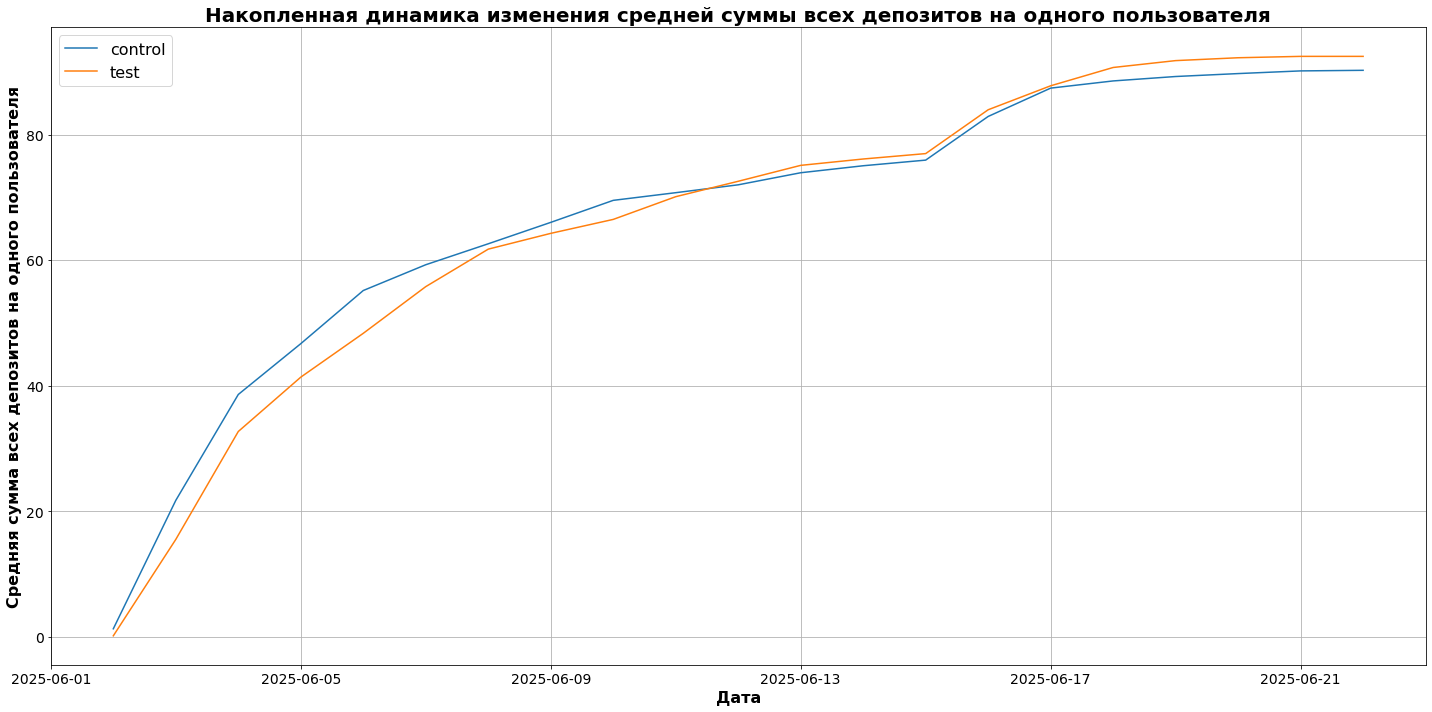

In [45]:
plt.figure(figsize=(20, 10))

# Визуализируем накопленную динамику изменения средней суммы всех депозитов на одного пользователя
for group in df_cumulative_avg_amount['group'].unique():
    plot_cumulative_avg_amount=df_cumulative_avg_amount[df_cumulative_avg_amount['group'] == group]
    plt.plot(plot_cumulative_avg_amount['date'], plot_cumulative_avg_amount['cumulative_avg_amount'], label=group)

# Задаем дополнительные настройки по отображению графика   
plt.title('Накопленная динамика изменения средней суммы всех депозитов на одного пользователя', fontsize=20, fontdict={'fontweight':'bold'})
plt.xlabel('Дата', fontsize=16, fontdict={'fontweight':'bold'})
plt.ylabel('Средняя сумма всех депозитов на одного пользователя', fontsize=16, fontdict={'fontweight':'bold'})
plt.grid()
plt.tick_params(labelsize=14) 
plt.legend(fontsize=16)
plt.tight_layout()
plt.show()

Рассмотрим динамику изменения p-value для ключевой метрики во время эксперимента.

In [46]:
# Пустой список для результатов
pval_records = []

# Сделаем цикл, который будет вносить в список таблицу с p-value
for date in sorted(df_abt['event_date'].unique()):
    amount_to_date=df_abt[df_abt['event_date'] <= date]     # фильтруем до итерируемой даты
    user_amount_control=amount_to_date[amount_to_date['group'] == 'control'].groupby('user_id')['amount'].sum() # считаем сумму депозита на юзера
    user_amount_test=amount_to_date[amount_to_date['group'] == 'test'].groupby('user_id')['amount'].sum()       #до итерируемой даты в каждой группе

    p_value_ttest = ttest_ind(user_amount_control, user_amount_test, equal_var=False)[1]    #считаем p-value
    
    # вносим данные за итерируемую дату в список
    pval_records.append({
        'date': date,
        'p_value': p_value_ttest
    })
    
# Объединяем все результаты в датафрейм
pvalue_df = pd.DataFrame(pval_records)
pvalue_df.tail()

,date,p_value
16,2025-06-18,0.348223
17,2025-06-19,0.270983
18,2025-06-20,0.275232
19,2025-06-21,0.318083
20,2025-06-22,0.338295


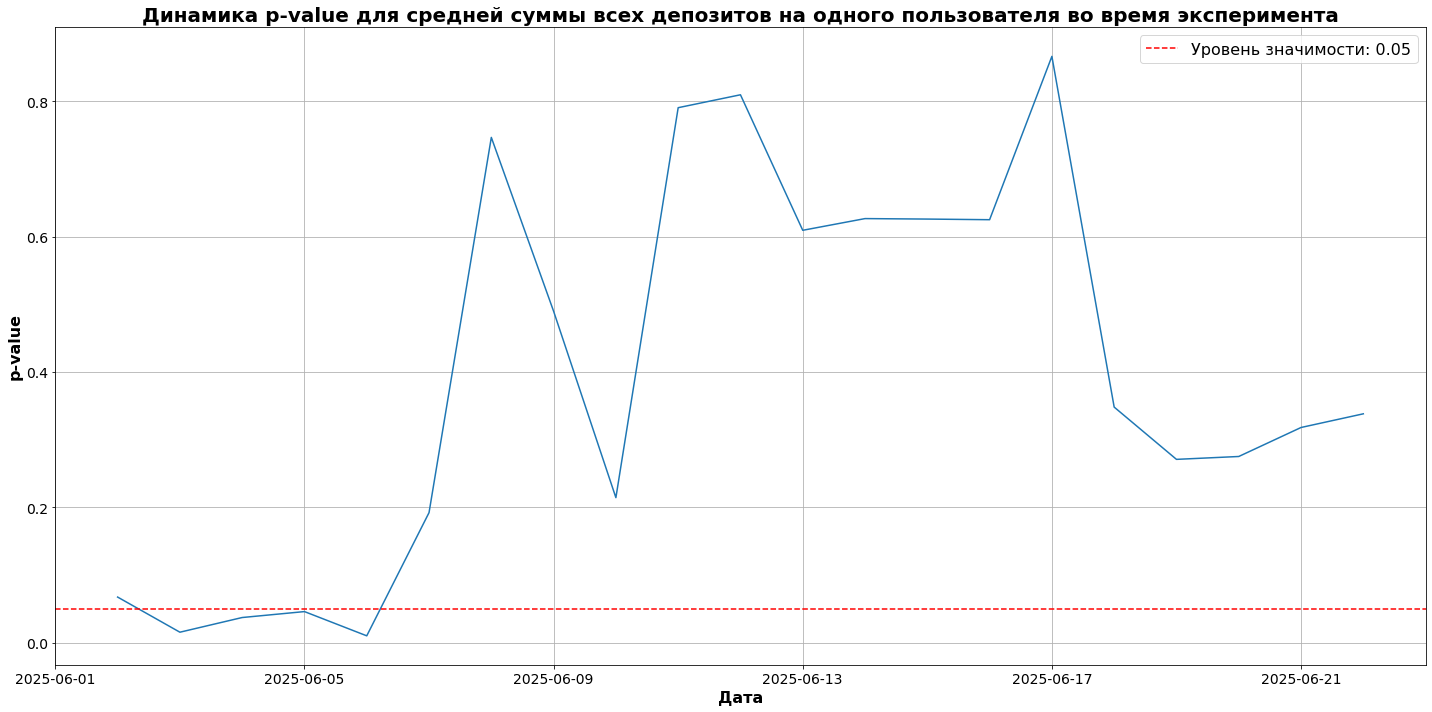

In [47]:
alpha=0.05
plt.figure(figsize=(20, 10))

# Визуализируем p-value во время эксперимента
plt.plot(pvalue_df['date'], pvalue_df['p_value'])

# Отобразим на графике уровень значимости alpha
plt.axhline(alpha, color='red', linestyle='--', label=f'Уровень значимости: {alpha}')

# Задаем дополнительные настройки по отображению графика 
plt.title('Динамика p-value для средней суммы всех депозитов на одного пользователя во время эксперимента', fontsize=20, fontdict={'fontweight':'bold'})
plt.xlabel('Дата', fontsize=16, fontdict={'fontweight':'bold'})
plt.ylabel('p-value', fontsize=16, fontdict={'fontweight':'bold'})
plt.legend(fontsize=16)
plt.grid()
plt.tick_params(labelsize=14) 
plt.tight_layout()
plt.show()

**Выводы по изменению ключевой метрики:**
1. **Общий результат - новый онбординг оказал положительное, но статистически незначимое влияние на ключевую метрику.** Средняя сумма депозита на пользователя увеличилась на 2,5% — с 90,2 до 92,5 у.е.
2. **Динамика накопленных значений.** Начиная с 12 июня накопленная средняя сумма депозита в тестовой группе стабильно превышает показатель контрольной группы. Обе группы демонстрируют положительный тренд, что свидетельствует об общей устойчивости метрики в течение эксперимента.
3. **Статистическая устойчивость результата.** Значение p-value превысило порог значимости уже 7 июня и в дальнейшем сохраняло нестабильный характер, стабилизировавшись только к 19 июня в районе 0.3. Для получения более надежных выводов рекомендуется продлить эксперимент на несколько дней для проверки устойчивости эффекта и исключения случайных колебаний.    

#### Барьерная метрика — конверсия из регистрации в первый депозит

In [48]:
# Для контрольной группы:
# Находим количество пользователей по каждому событию
event_groupped_control=control_group.groupby('event_name')['user_id'].nunique().reset_index(name='count_users')
# Считаем количество пользователей, совершивших регистрацию
user_reg_count_control=event_groupped_control[event_groupped_control['event_name']=='registration']['count_users'].iloc[0]
# Считаем количество пользователей, сделавших первый депозит
user_1deposit_count_control=event_groupped_control[event_groupped_control['event_name']=='first_deposit']['count_users'].iloc[0]
# Считаем конверсию из регистрации в первый депозит
conv_reg_1deposit_control=user_1deposit_count_control/user_reg_count_control*100

# Аналогично для тестовой группы
# Находим количество пользователей по каждому событию
event_groupped_test=test_group.groupby('event_name')['user_id'].nunique().reset_index(name='count_users')
# Считаем количество пользователей, совершивших регистрацию
user_reg_count_test=event_groupped_test[event_groupped_test['event_name']=='registration']['count_users'].iloc[0]
# Считаем количество пользователей, сделавших первый депозит
user_1deposit_count_test=event_groupped_test[event_groupped_test['event_name']=='first_deposit']['count_users'].iloc[0]
# Считаем конверсию из регистрации в первый депозит
conv_reg_1deposit_test=user_1deposit_count_test/user_reg_count_test*100

# Считаем абсолютное изменение значений в тестовой группе по сравнению с контрольной
conv_reg_1deposit_abs=conv_reg_1deposit_test-conv_reg_1deposit_control

# Считаем относительное изменение значений в тестовой группе по сравнению с контрольной
conv_reg_1deposit_relative=(conv_reg_1deposit_test-conv_reg_1deposit_control)/conv_reg_1deposit_control*100

print(f'''Конверсия из регистрации в первый депозит в тестовой группе: {conv_reg_1deposit_test:.2f}
Конверсия из регистрации в первый депозит в контрольной группе: {conv_reg_1deposit_control:.2f}
Абсолютное изменение метрики: {conv_reg_1deposit_abs:.2f}
Относительное изменение метрики: {conv_reg_1deposit_relative:.2f}%''')

Конверсия из регистрации в первый депозит в тестовой группе: 70.04
Конверсия из регистрации в первый депозит в контрольной группе: 71.54
Абсолютное изменение метрики: -1.51
Относительное изменение метрики: -2.11%


Далее, проведем `z-тест` для пропорций (так как конверсия - долевая метрика). Сформулируем гипотезы:

- **Нулевая гипотеза:** Конверсия из регистрации в первый депозит в контрольной и тестовой группах не различается.
- **Альтернативаня гипотеза:** Конверсия из регистрации в первый депозит в контрольной и тестовой группах имеет статистически значимое различие.

In [49]:
alpha=0.05

# количество пользователей, совершивших регистрацию
n_a=user_reg_count_control
n_b=user_reg_count_test

# количество пользователей, сделавших первый депозит
m_a=user_1deposit_count_control
m_b=user_1deposit_count_test

# конверсия из регистрации в первый депозит
p_a=m_a/n_a
p_b=m_b/n_b

# проверяем предпосылку о достаточном количестве данных
if (p_a*n_a > 10) and ((1-p_a)*n_a > 10) and (p_b*n_b > 10) and ((1-p_b)*n_b > 10):
    print('Предпосылка о достаточном количестве данных выполняется!')
else:
    print('Предпосылка о достаточном количестве данных НЕ выполняется!')
    
# проводим тест
stat_ztest, p_value_ztest = proportions_ztest( [m_a, m_b],
                                               [n_a, n_b],
                                               alternative='two-sided')
# выведем полученное p-value 
print(f'pvalue={round(p_value_ztest, 4)}') 

# Отображаем результат
if p_value_ztest > alpha:
    print('''Принимаем НУЛЕВУЮ гипотезу!
Конверсия из регистрации в первый депозит в контрольной и тестовой группах не различается.''')
else:
    print('''Принимаем АЛЬТЕРНАТИВНУЮ гипотезу!
Конверсия из регистрации в первый депозит в контрольной и тестовой группах имеет статистически значимое различие.''')

Предпосылка о достаточном количестве данных выполняется!
pvalue=0.1205
Принимаем НУЛЕВУЮ гипотезу!
Конверсия из регистрации в первый депозит в контрольной и тестовой группах не различается.


**Барьерная метрика (конверсия из регистрации в первый депозит) в тестовой группе снизилась на 2,1% по сравнению с контрольной группой. Однако данное различие не является статистически значимым. Таким образом, нет оснований утверждать, что обновленный онбординг оказал негативное влияние на готовность новых пользователей совершать первое пополнение счёта.**

#### Вспомогательная метрика — конверсия из первого депозита во второй

In [50]:
# Для контрольной группы:
# Считаем количество пользователей, сделавших второй депозит
user_2deposit_count_control=event_groupped_control[event_groupped_control['event_name']=='second_deposit']['count_users'].iloc[0]
# Считаем конверсию из первого депозита во второй
conv_1_2_deposit_control=user_2deposit_count_control/user_1deposit_count_control*100

# Для тестовой группы:
# Считаем количество пользователей, сделавших второй депозит
user_2deposit_count_test=event_groupped_test[event_groupped_test['event_name']=='second_deposit']['count_users'].iloc[0]
# Считаем конверсию из первого депозита во второй
conv_1_2_deposit_test=user_2deposit_count_test/user_1deposit_count_test*100

# Считаем абсолютное изменение значений в тестовой группе по сравнению с контрольной
conv_1_2_deposit_abs=conv_1_2_deposit_test-conv_1_2_deposit_control

# Считаем относительное изменение значений в тестовой группе по сравнению с контрольной
conv_1_2_deposit_relative=(conv_1_2_deposit_test-conv_1_2_deposit_control)/conv_1_2_deposit_control*100

print(f'''Конверсия из первого депозита во второй в тестовой группе: {conv_1_2_deposit_test:.2f}
Конверсия из первого депозита во второй в контрольной группе: {conv_1_2_deposit_control:.2f}
Абсолютное изменение метрики: {conv_1_2_deposit_abs:.2f}
Относительное изменение метрики: {conv_1_2_deposit_relative:.2f}%''')

Конверсия из первого депозита во второй в тестовой группе: 32.61
Конверсия из первого депозита во второй в контрольной группе: 20.26
Абсолютное изменение метрики: 12.35
Относительное изменение метрики: 60.95%


Далее, проведем `z-тест` пропорций (так как конверсия - долевая метрика). До начала сформулируем гипотезы:

- **Нулевая гипотеза:** Конверсия из первого депозита во второй в контрольной и тестовой группах не различается.
- **Альтернативаня гипотеза:** Конверсия из первого депозита во второй в контрольной и тестовой группах имеет статистически значимое различие.

In [51]:
alpha=0.05

# количество пользователей, сделавших первый депозит
n_a=user_1deposit_count_control
n_b=user_1deposit_count_test

# количество пользователей, сделавших второй депозит
m_a=user_2deposit_count_control
m_b=user_2deposit_count_test

# конверсия из регистрации в первый депозит
p_a=m_a/n_a
p_b=m_b/n_b

# проверяем предпосылку о достаточном количестве данных
if (p_a*n_a > 10) and ((1-p_a)*n_a > 10) and (p_b*n_b > 10) and ((1-p_b)*n_b > 10):
    print('Предпосылка о достаточном количестве данных выполняется!')
else:
    print('Предпосылка о достаточном количестве данных НЕ выполняется!')
    
# проводим тест
stat_ztest, p_value_ztest = proportions_ztest( [m_a, m_b],
                                               [n_a, n_b],
                                               alternative='two-sided')

# выведем полученное p-value 
print(f'pvalue={round(p_value_ztest, 35)}') 

# Отображаем результат
if p_value_ztest > alpha:
    print('''Принимаем НУЛЕВУЮ гипотезу!
Конверсия из первого депозита во второй в контрольной и тестовой группах не различается.''')
else:
    print('''Принимаем АЛЬТЕРНАТИВНУЮ гипотезу!
Конверсия из первого депозита во второй в контрольной и тестовой группах имеет статистически значимое различие.''')

Предпосылка о достаточном количестве данных выполняется!
pvalue=1.9355886e-28
Принимаем АЛЬТЕРНАТИВНУЮ гипотезу!
Конверсия из первого депозита во второй в контрольной и тестовой группах имеет статистически значимое различие.


**Конверсия из первого депозита во второй в тестовой группе показала статистически значимый рост на 61%: с 20,3% до 32,6%. Таким образом, обновленный онбординг повышает вероятность повторного пополнения счёта.**

#### Вспомогательная метрика — средняя сумма всех депозитов на пользователя, который открыл хотя бы один депозит

In [52]:
# Оставляем пользователей сделавших 1 или 2 депозита
control_group_filt=control_group[control_group['event_name'].isin(['first_deposit', 'second_deposit'])]
test_group_filt=test_group[test_group['event_name'].isin(['first_deposit', 'second_deposit'])]

# Считаем сумму депозитов на каждого пользователя в двух группах
dep_user_amount_control=control_group_filt.groupby('user_id')['amount'].sum()
dep_user_amount_test=test_group_filt.groupby('user_id')['amount'].sum()

# Считаем среднюю сумму всех депозитов на одного пользователя (включая тех, кто установил приложение или открыл веб-версию)
mean_dep_amount_control=dep_user_amount_control.mean()
mean_dep_amount_test=dep_user_amount_test.mean()

# Считаем абсолютное изменение значений в тестовой группе по сравнению с контрольной
mean_depp_amount_abs=mean_dep_amount_test-mean_dep_amount_control

# Считаем относительное изменение значений в тестовой группе по сравнению с контрольной
mean_dep_amount_relative=(mean_dep_amount_test-mean_dep_amount_control)/mean_dep_amount_control*100

print(f'''Средняя сумма всех депозитов на одного пользователя в тестовой группе: {mean_dep_amount_test:.2f}
Средняя сумма всех депозитов на одного пользователя в контрольной группе: {mean_dep_amount_control:.2f}
Абсолютное изменение метрики: {mean_depp_amount_abs:.2f}
Относительное изменение метрики: {mean_dep_amount_relative:.2f}%''')

Средняя сумма всех депозитов на одного пользователя в тестовой группе: 141.40
Средняя сумма всех депозитов на одного пользователя в контрольной группе: 135.50
Абсолютное изменение метрики: 5.90
Относительное изменение метрики: 4.35%


Далее, проведем `t-тест` Уэлча (так как равенство дисперсий нам неизвестно), чтобы убедиться, что значения вспомогательной метрики в двух группах не различается или различия не статистически значимы. Для этого сформулируем гипотезы:

- **Нулевая гипотеза:** Средняя сумма всех депозитов на одного пользователя, совершившего хотя бы один депозит, в контрольной и тестовой группах не различается.
- **Альтернативаня гипотеза:** Средняя сумма всех депозитов на одного пользователя, совершившего хотя бы один депозит, в контрольной и тестовой группах имеет статистически значимое различие.

In [53]:
alpha=0.05
p_value_ttest = ttest_ind(dep_user_amount_control,
                          dep_user_amount_test,
                          equal_var=False,
                          alternative='two-sided')[1]

# выведем полученное p-value 
print(f'pvalue={round(p_value_ttest, 5)}') 

# Отображаем результат
if p_value_ttest > alpha:
    print('''Принимаем НУЛЕВУЮ гипотезу!
Средняя сумма всех депозитов на одного пользователя, совершившего хотя бы один депозит, в контрольной и тестовой группах не различается.''')
else:
    print('''Принимаем АЛЬТЕРНАТИВНУЮ гипотезу!
Средняя сумма всех депозитов на одного пользователя, совершившего хотя бы один депозит, в контрольной и тестовой группах имеет статистически значимое различие.''')

pvalue=0.04004
Принимаем АЛЬТЕРНАТИВНУЮ гипотезу!
Средняя сумма всех депозитов на одного пользователя, совершившего хотя бы один депозит, в контрольной и тестовой группах имеет статистически значимое различие.


**Вспомогательная метрика (средняя сумма депозитов на пользователя, совершившего хотя бы одно пополнение) показала статистически значимое улучшение. В тестовой группе данный показатель вырос на 4,35% по сравнению с контрольной группой. Таким образом, можно сделать вывод, что новый онбординг не только привлёк более платежеспособных пользователей, но и положительно повлиял на сумму их инвестиций.**

### 📌Промежуточные выводы по результатам A/B-теста:

- Хотя в тестовой группе на 12% больше пользователей не завершило онбординг, это не привело к статистически значимому снижению конверсии в первый депозит (-2,1%). **Те пользователи, которые прошли обновленный онбординг, демонстрируют более высокую вовлеченность**: количество пользователей, совершивших покупку актива возросло на **7%** (на 200 человек), а совершивших повторный депозит на **8%** (на 320 человек).
- **Новый онбординг повысил конверсию во второй депозит для активов всех категорий риска.** Наиболее выраженный эффект наблюдается для высокорискованных активов — разница с контрольной группой составляет 18.3%. Для низкорискованных активов конверсия выросла на 7.4% с двукратным увеличением количества повторных депозитов. По активам среднего риска разница статистически незначима (2.5%), что указывает на нейтральное влияние нового онбординга на эту категорию пользователей.
- **Ключевая метрика (средняя сумма всех депозитов на пользователя): рост на 2,5% статистически незначим, но демонстрирует положительный тренд.** Обновленный онбординг не ухудшает пользовательский опыт. Следует отметить, что в течение эксперимента p-value последовательно снижался, приближаясь к порогу значимости. Для получения однозначного вывода рекомендуется продлить тестирование, что позволило бы либо подтвердить статистическую значимость текущего эффекта, либо доказать его отсутствие.
- **Барьерная метрика (конверсия из регистрации в первый депозит): снижение на 2,1% статистически незначимо.** Таким образом, нет оснований утверждать, что обновленный онбординг оказал негативное влияние на готовность новых пользователей совершать первое пополнение счёта.
- **Вспомогательные метрики показали статистически значимое улучшение: конверсия из первого во второй депозит возросла на 61%, а средняя сумма депозитов платящих пользователей возросла на 4,35%.**

**Таким образом, обновленный онбординг оказал общее положительное влияние: не вызвав статистически значимого ухудшения барьерной метрики и не оказав негативного эффекта на ключевую метрику, он привёл к значительному росту вспомогательных показателей —  конверсии из первого во второй депозит и средней суммы депозитов среди платящих пользователей, что наиболее выражено в сегменте высокорискованных активов. Для полного понимания эффекта и дальнейшей оптимизации требуется дополнительный анализ влияния фичи на различные сегменты платящих пользователей.**

## Анализ влияния нового онбординга на поведение разных сегментов платящих пользователей

В данном разделе будет проведен анализ, направленный на выявление дифференцированного влияния нового онбординга на поведенческие сегменты платящих пользователей. **Выдвинем две гипотезы:**
1. Пользователи, склонные к небольшим депозитам, после прохождения более углубленного онбординга могли стать более осторожными — сократить свои вложения или прекратить инвестиции. Это предположение будет проверяться через оценку 25-го перцентиля суммы депозитов в тестовой группе.
2. Пользователи, склонные к более крупным депозитам, могли сильнее вовлечься в продукт и начать вносить больше средств. Это предположение будет проверяться через оценку 75-го перцентиля суммы депозитов в тестовой группе.

Для проверки гипотез и количественной оценки изменений проведем сравнительный анализ перцентилей (25-го, 50-го, 75-го) суммы всех депозитов на платящего пользователя между контрольной и тестовой группами с применением bootstrap-теста.

In [54]:
# При расчете вспомогательной метрики мы получили таблицы с платящими пользователями и общей их суммы депозита
# таблицы называются dep_user_amount_control и dep_user_amount_test
control = dep_user_amount_control
test = dep_user_amount_test

# Фиксируем сид для воспроизводимости
np.random.seed(341)

# сделаем 10000 итераций
n_iterations = 10000

#пустые списки для заполнения разницы сумму каждого перцентиля
boot_diffs_75p = []
boot_diffs_25p = []
boot_diffs_50p = []

# Bootstrap-разница перцентилей между тестовой и контрольной группами
for i in range(n_iterations):
    boot_control = np.random.choice(control, size=len(control), replace=True)
    boot_test = np.random.choice(test, size=len(test), replace=True)

    # Для расчёта перцентиля используем .percentile() из библиотеки numpy 
    control_75p = np.percentile(boot_control, 75)
    test_75p = np.percentile(boot_test, 75)
    
    control_25p = np.percentile(boot_control, 25)
    test_25p = np.percentile(boot_test, 25)
    
    control_50p = np.percentile(boot_control, 50)
    test_50p = np.percentile(boot_test, 50)
    
    # Находим разницу между значениями тестовой и контрольной групп
    boot_diffs_75p.append(test_75p - control_75p)
    boot_diffs_25p.append(test_25p - control_25p)
    boot_diffs_50p.append(test_50p - control_50p)
    
# Создаём массив разниц между перцентилями тестовой и контрольной групп
boot_diffs_75p = np.array(boot_diffs_75p)
boot_diffs_25p = np.array(boot_diffs_25p)
boot_diffs_50p = np.array(boot_diffs_50p)

# Доверительный интервал разницы между перцентилями (перцентильный метод)
diff_ci_25p = np.percentile(boot_diffs_25p, [2.5, 97.5])
diff_ci_50p = np.percentile(boot_diffs_50p, [2.5, 97.5])
diff_ci_75p = np.percentile(boot_diffs_75p, [2.5, 97.5])

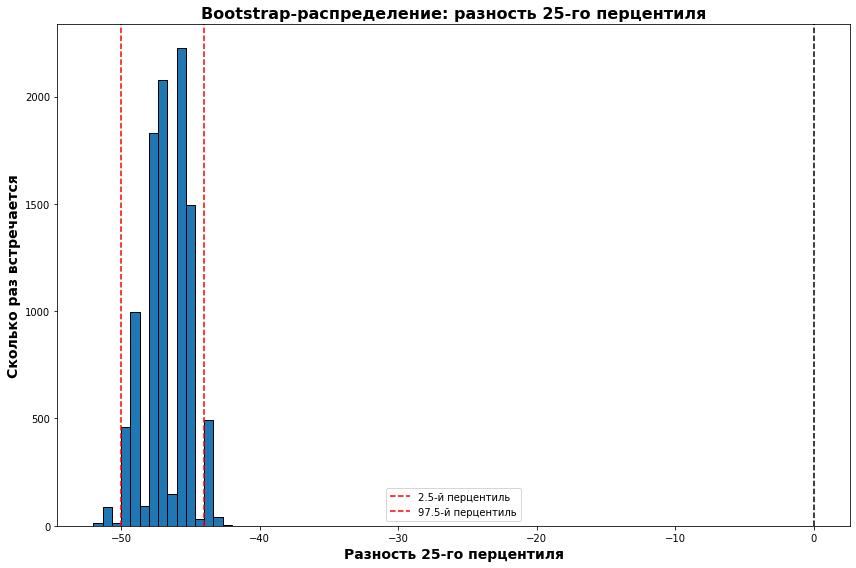

25-й перцентиль контрольной группы: 95.00
25-й перцентиль тестовой группы: 48.00
95%-й доверительный интервал разности 25-х перцентилей [-50.00, -44.00]


In [55]:
# визуализируем и выведем характеристики для каждого перцентиля
# для 25-го перцентиля
plt.figure(figsize=(12, 8))

plt.hist(boot_diffs_25p, bins=15, edgecolor='black')

plt.axvline(diff_ci_25p[0], color='red', linestyle='--', label='2.5-й перцентиль')
plt.axvline(diff_ci_25p[1], color='red', linestyle='--', label='97.5-й перцентиль')
plt.axvline(0, linestyle='--', color='black')

# Задаем дополнительные настройки по отображению графика  
plt.title("Bootstrap-распределение: разность 25-го перцентиля", fontsize=16, fontdict={'fontweight':'bold'})
plt.legend()
plt.xlabel('Разность 25-го перцентиля', fontsize=14, fontdict={'fontweight':'bold'})
plt.ylabel('Сколько раз встречается', fontsize=14, fontdict={'fontweight':'bold'})
plt.tight_layout()
plt.show()

# Вывод доверительного интервала
print(f"25-й перцентиль контрольной группы: {np.percentile(control, 25):.2f}")
print(f"25-й перцентиль тестовой группы: {np.percentile(test, 25):.2f}")
print(f"95%-й доверительный интервал разности 25-х перцентилей [{diff_ci_25p[0]:.2f}, {diff_ci_25p[1]:.2f}]")

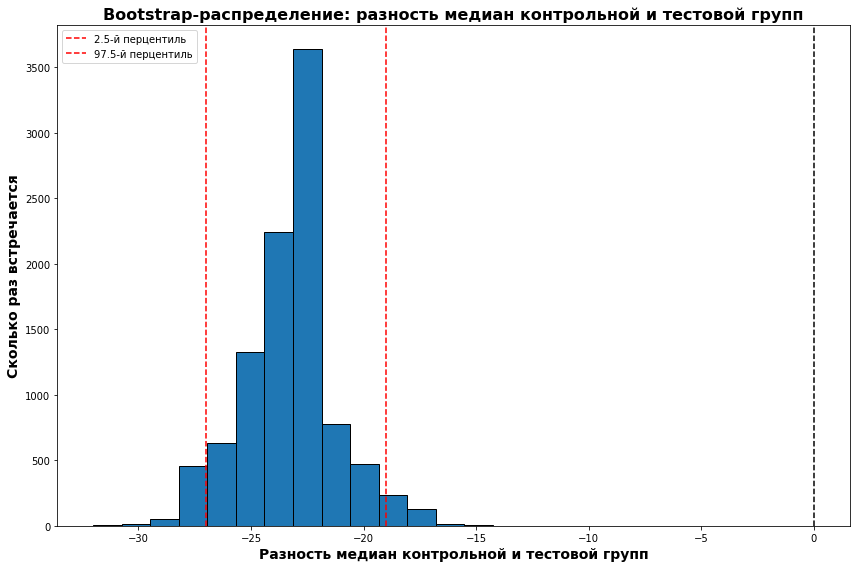

Медиана контрольной группы: 118.00
Медиана тестовой группы: 94.00
95%-й доверительный интервал разности медиан [-27.00, -19.00]


In [56]:
# визуализируем и выведем характеристики для каждого перцентиля
# для 50-го перцентиля
plt.figure(figsize=(12, 8))

plt.hist(boot_diffs_50p, bins=15, edgecolor='black')

plt.axvline(diff_ci_50p[0], color='red', linestyle='--', label='2.5-й перцентиль')
plt.axvline(diff_ci_50p[1], color='red', linestyle='--', label='97.5-й перцентиль')
plt.axvline(0, linestyle='--', color='black')

# Задаем дополнительные настройки по отображению графика  
plt.title("Bootstrap-распределение: разность медиан контрольной и тестовой групп", fontsize=16, fontdict={'fontweight':'bold'})
plt.legend()
plt.xlabel('Разность медиан контрольной и тестовой групп', fontsize=14, fontdict={'fontweight':'bold'})
plt.ylabel('Сколько раз встречается', fontsize=14, fontdict={'fontweight':'bold'})
plt.tight_layout()
plt.show()

# Вывод доверительного интервала
print(f"Медиана контрольной группы: {np.percentile(control, 50):.2f}")
print(f"Медиана тестовой группы: {np.percentile(test, 50):.2f}")
print(f"95%-й доверительный интервал разности медиан [{diff_ci_50p[0]:.2f}, {diff_ci_50p[1]:.2f}]")

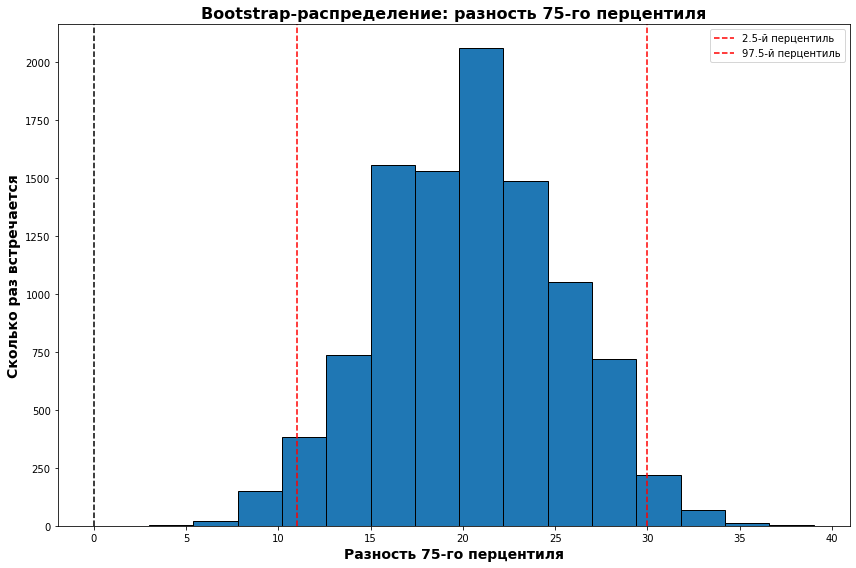

75-й перцентиль контрольной группы: 159.00
75-й перцентиль тестовой группы: 179.50
95%-й доверительный интервал разности 75-х перцентилей [11.00, 30.00]


In [57]:
# визуализируем и выведем характеристики для каждого перцентиля
# для 95-го перцентиля
plt.figure(figsize=(12, 8))

plt.hist(boot_diffs_75p, bins=15, edgecolor='black')

plt.axvline(diff_ci_75p[0], color='red', linestyle='--', label='2.5-й перцентиль')
plt.axvline(diff_ci_75p[1], color='red', linestyle='--', label='97.5-й перцентиль')
plt.axvline(0, linestyle='--', color='black')

# Задаем дополнительные настройки по отображению графика  
plt.title("Bootstrap-распределение: разность 75-го перцентиля", fontsize=16, fontdict={'fontweight':'bold'})
plt.legend()
plt.xlabel('Разность 75-го перцентиля', fontsize=14, fontdict={'fontweight':'bold'})
plt.ylabel('Сколько раз встречается', fontsize=14, fontdict={'fontweight':'bold'})
plt.tight_layout()
plt.show()

# Вывод доверительного интервала
print(f"75-й перцентиль контрольной группы: {np.percentile(control, 75):.2f}")
print(f"75-й перцентиль тестовой группы: {np.percentile(test, 75):.2f}")
print(f"95%-й доверительный интервал разности 75-х перцентилей [{diff_ci_75p[0]:.2f}, {diff_ci_75p[1]:.2f}]")

### 📌Промежуточные выводы по результатам bootstrap-теста:

- **95% доверительный интервал для разницы 25-х перцентилей полностью лежит в отрицательной области.** Это означает, что пользователи, склонные к небольшим депозитам, стали вносить в среднем на 44–50 у.е. меньше, что **подтверждает нашу гипотезу о том, что данный сегмент пользователей стал сокращать или прекращать свои инвестиции.**
- **95% доверительный интервал для разницы 75-х перцентилей полностью лежит в положительной области**, демонстрируя значимый рост суммы депозитов у наиболее платежеспособных пользователей на 11–30 у.е. **Это подтверждает гипотезу о более глубоком вовлечении и готовности к крупным инвестициям у данного сегмента.**
- **статистические значимое снижение медианной суммы депозитов (на 19–27 у.е.) указывает на смещение поведения основной массы пользователей в сторону меньших рисков и более скромных инвестиций.** Это объясняется как сокращение мелких и умеренных депозитов, в то время как рост крупных депозитов затрагивает лишь небольшую часть распределения.

## 📝 Выводы и рекомендации



1. ✅ **Рост вовлеченности:** Конверсия из первого во второй депозит выросла на 61% (статистически значимо). Это главное достижение.
2. ✅ **Повышенная осознанность:** Для высокорискованных активов конверсия во второй депозит выросла на 18.3%, несмотря на снижение числа пользователей, сделавших первый депозитов. Это свидетельствует о более осознанном подходе к высокорискованным инвестициям после прохождения обновлённого онбординга.
3. ✅ **Улучшение качества аудитории:** Средняя сумма депозита платящих пользователей значимо выросла на 4.35%. Бутстрап-анализ подтвердил, что наиболее активные пользователи ("киты") стали вносить на 11–30 у.е. больше.
4. ✅ **Барьерная метрика осталась стабильной:** Конверсия в первый депозит изменилась незначительно (-2.1%) и статистически незначимо. Обновленный онбординг не отпугнул новых пользователей совершать первое пополнение счёта.
5. ⚠️ **Рост оттока на этапе обучения:** В тестовой группе 12% пользователей не завершили обучение (против 2.4% в контрольной группе). Это указывает на необходимость оптимизации онбординга для снижения отсева и поддержки начинающих инвесторов.
6. ⚠️ **Повышенная осторожность:** Пользователи, склонные к небольшим депозитам, стали более осторожными - их средний депозит сократился на 19–50 у.е. Это указывает на то, что обучение повысило осознанность, особенно среди начинающих инвесторов, сделав их более сдержанными в расходах.

**Новый обучающий онбординг успешно решает ключевую проблему низкой вовлеченности и отсутствия повторных инвестиций, демонстрируя общую эффективность и безопасность. Хотя значимого роста средней суммы депозита не зафиксировано, обновление качественно улучшило поведение пользователей — особенно тех, кто работает с высокорискованными активами. Замедление среди осторожных пользователей, склонных к небольшим депозитам, не является критичным и может быть скорректировано дальнейшей оптимизацией онбординга.**

### 💡 Рекомендации:

- **Внедрить новый онбординг**, так как он доказал свою эффективность в повышении лояльности и привлечении более платежеспособных пользователей, не оказывая негативного влияния на барьерные метрики.
- Для получения однозначного и статистически надежного вывода о влиянии нового онбординга на среднюю сумму депозита на пользователя **рекомендуется продлить A/B-тест на 5-7 дней**. Это позволит добиться стабильности и надежности p-value. Хоть положительные результаты теста (рост повторных депозитов, повышение осознанности) уже позволяют рассматривать внедрение обновленного онбординга, продление теста даст полную ясность по финансовому эффекту.
- **Продолжить оптимизацию онбординга** для снижения оттока пользователей на этапе обучения. Например, сделать образовательный процесс более интерактивным, добавить мотивационные элементы. Для опытных инвесторов можно сделать более краткую версию онбординга, для более осторожных пользователей - делать акцент на низкорискованных активах и защитных стратегиях.